### Analyse exploratoire des données pour la prédiction des prix immobiliers

Ce projet est réalisé pour le compte de Laplace Immo, un réseau national d'agences immobilières. L'objectif est de fournir aux équipes un outil puissant et fiable pour l'estimation des prix des biens immobiliers. Dans un marché où le prix est influencé par une multitude de facteurs, parfois subtils, un modèle de prédiction précis est un atout stratégique majeur. Il permet non seulement d'affiner les négociations, mais aussi d'offrir une meilleure expérience client en justifiant les estimations de manière objective.

Pour construire ce modèle, nous disposons d'un jeu de données exhaustif sur les ventes de maisons résidentielles à Ames, dans l'Iowa (États-Unis). Ce dataset est une référence dans le domaine de la modélisation prédictive car il contient 79 variables explicatives. Celles-ci couvrent presque tous les aspects d'une propriété, depuis ses caractéristiques physiques (surface, nombre de pièces, année de construction) à sa localisation, en passant par la qualité des finitions et les conditions de la vente.


Cette première étape d'analyse exploratoire est fondamentale. Elle vise à :
- Comprendre la structure et la qualité des données.
  
- Analyser la variable cible, `SalePrice`, pour identifier sa distribution et ses particularités.

- Détecter les valeurs manquantes et établir une stratégie pour les traiter.

- Explorer les relations entre les différentes variables (numériques et catégorielles) et le prix de vente.

- Créer de nouvelles variables pertinentes (feature engineering) pour améliorer la modélisation.  

- Identifier les outliers et évaluer leur impact potentiel.

Les conclusions de cette analyse serviront de base à la phase de prétraitement des données et de modélisation.

### Importation des librairies

Pour mener à bien notre analyse, nous devons d’abord importer les librairies Python essentielles. Cette cellule réunit tous les outils nécessaires pour explorer et manipuler les données.

In [54]:
# Librairies pour la manipulation des données
import pandas as pd
import numpy as np
from pathlib import Path
import warnings

# Librairies pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Librairies pour l'analyse statistique
from scipy import stats
from scipy.stats import normaltest, skew, kurtosis

# Librairies pour le logging et la configuration
from loguru import logger
import sys
import pendulum

warnings.filterwarnings("ignore")

# Configuration du logger
log_fmt = "<green>{time:YYYY-MM-DD HH:mm:ss.SSS!UTC}</green> | <level>{level: <8}</level> | <cyan>{name}</cyan>:<cyan>{function}</cyan>:<cyan>{line}</cyan> - {message}"
logger.configure(handlers=[{"sink": sys.stderr, "format": log_fmt}])

# Configuration des graphiques
plt.style.use("default")
sns.set_palette("husl")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Variables globales
CURRENT_DATE = pendulum.now(tz="UTC")
RANDOM_STATE = 42

logger.info("Toutes les librairies ont été importées avec succès")

2025-07-30 20:28:00.752 | INFO     | __main__:<module>:37 - Toutes les librairies ont été importées avec succès


### Configuration des chemins et paramètres

Dans cette section, nous définissons les chemins d'accès aux différents dossiers du projet, comme les données brutes, les fichiers de sortie et les rapports. Nous initialisons aussi des paramètres globaux qui seront utilisés tout au long du notebook pour assurer la cohérence des analyses et des visualisations.

In [55]:
# Définition des chemins
PROJECT_DIR = Path.cwd().parent  # Récupère la racine du projet
DATA_DIR = PROJECT_DIR / "house_price_dataset"  # Données sont à la racine du projet
NOTEBOOKS_DIR = PROJECT_DIR / "notebooks"  # Dossier notebooks
OUTPUT_DIR = NOTEBOOKS_DIR / "output_files"  # Sorties dans notebooks/output_files
REPORTS_DIR = NOTEBOOKS_DIR / "reports"    # Rapports dans notebooks/reports

# Création des répertoires s'ils n'existent pas
for directory in [OUTPUT_DIR, REPORTS_DIR]:
    directory.mkdir(parents=True, exist_ok=True)

# Paramètres de l'analyse
TARGET_VARIABLE = "SalePrice"
FIGSIZE_LARGE = (15, 8)
FIGSIZE_MEDIUM = (12, 6)
FIGSIZE_SMALL = (10, 5)

logger.info("Configuration terminée")
logger.info(f"Répertoire du projet: {PROJECT_DIR}")
logger.info(f"Répertoire des données: {DATA_DIR}")
logger.info(f"Répertoire de sortie: {OUTPUT_DIR}")
logger.info(f"Variable cible: {TARGET_VARIABLE}")

2025-07-30 20:28:01.009 | INFO     | __main__:<module>:18 - Configuration terminée
2025-07-30 20:28:01.011 | INFO     | __main__:<module>:19 - Répertoire du projet: d:\Documents\IT\mlops_house_price_prediction
2025-07-30 20:28:01.014 | INFO     | __main__:<module>:20 - Répertoire des données: d:\Documents\IT\mlops_house_price_prediction\house_price_dataset
2025-07-30 20:28:01.017 | INFO     | __main__:<module>:21 - Répertoire de sortie: d:\Documents\IT\mlops_house_price_prediction\notebooks\output_files
2025-07-30 20:28:01.019 | INFO     | __main__:<module>:22 - Variable cible: SalePrice


### Chargement et exploration initiale des données

Nous allons à présent charger le jeu de données dans un DataFrame Pandas. Celui-ci est la structure de base pour la manipulation de données en Python. Cette première interaction nous permettra d'avoir un aperçu de sa structure, de ses dimensions et de la nature des informations qu'il contient.

In [56]:
# Chargement du jeu de données
try:
    df = pd.read_csv(DATA_DIR / "ames_housing.csv")
    logger.info(f"Dataset chargé avec succès. Forme: {df.shape}")
    logger.info(f"Nombre de lignes: {df.shape[0]:,}")
    logger.info(f"Nombre de colonnes: {df.shape[1]:,}")
except FileNotFoundError:
    logger.error(f"Le fichier ames_housing.csv n'a pas été trouvé dans {DATA_DIR}")
    raise

# Affichage des premières lignes
print("\n=== APERÇU DES DONNÉES ===")
print(df.head())

# Informations générales sur le dataset
print("\n=== INFORMATIONS GÉNÉRALES ===")
print(df.info())

# Statistiques descriptives
print("\n=== STATISTIQUES DESCRIPTIVES (Variables numériques) ===")
print(df.describe())

2025-07-30 20:28:01.790 | INFO     | __main__:<module>:4 - Dataset chargé avec succès. Forme: (1460, 81)
2025-07-30 20:28:01.790 | INFO     | __main__:<module>:5 - Nombre de lignes: 1,460
2025-07-30 20:28:01.802 | INFO     | __main__:<module>:6 - Nombre de colonnes: 81



=== APERÇU DES DONNÉES ===
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2

Les données ont été chargées avec succès et cette première exploration révèle plusieurs points importants. Le jeu de données comprend 2 930 lignes, chacune représentant une maison vendue.

L’aperçu des données montre un mélange de variables numériques, comme `LotFrontage` ou `YearBuilt`, et de variables catégorielles, telles que `MSZoning` ou `Street`.

Les informations générales révèlent que certaines colonnes contiennent des valeurs manquantes, par exemple `LotFrontage` qui compte moins de 2 930 entrées non nulles. Cette fonction précise aussi les types de données présents, comme int64, float64 et object.

Enfin, les statistiques descriptives résument les variables numériques et montrent des écarts importants entre certaines d’entre elles, notamment entre `YearBuilt` et `SalePrice`, ce qui laisse penser qu’une standardisation pourrait être nécessaire avant la modélisation.

In [57]:
# Analyse des types de données
print("\n=== ANALYSE DES TYPES DE DONNÉES ===")

# Séparation des variables par type
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_vars = df.select_dtypes(include=["object"]).columns.tolist()

print(f"Variables numériques ({len(numeric_vars)}): {numeric_vars[:10]}...")
print(f"Variables catégorielles ({len(categorical_vars)}): {categorical_vars[:10]}...")

# Vérification de la présence de la variable cible
if TARGET_VARIABLE in df.columns:
    logger.info(f"Variable cible '{TARGET_VARIABLE}' trouvée dans le dataset")
    print(f"\nStatistiques de la variable cible '{TARGET_VARIABLE}':")
    print(df[TARGET_VARIABLE].describe())
else:
    logger.error(f"Variable cible '{TARGET_VARIABLE}' non trouvée dans le dataset")
    print(f"Colonnes disponibles: {list(df.columns)}")

# Sauvegarde des informations de base
dataset_info = {
    "shape": df.shape,
    "numeric_vars": len(numeric_vars),
    "categorical_vars": len(categorical_vars),
    "target_variable": TARGET_VARIABLE,
    "analysis_date": CURRENT_DATE.isoformat(),
}

logger.info("Exploration initiale terminée")

2025-07-30 20:28:02.947 | INFO     | __main__:<module>:13 - Variable cible 'SalePrice' trouvée dans le dataset
2025-07-30 20:28:02.967 | INFO     | __main__:<module>:29 - Exploration initiale terminée



=== ANALYSE DES TYPES DE DONNÉES ===
Variables numériques (38): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1']...
Variables catégorielles (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']...

Statistiques de la variable cible 'SalePrice':
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


L'analyse des types de données a permis de classer nos différentes variables :
- 38 variables numériques : Celles-ci incluent des identifiants (`Order`, `PID`), des mesures (`GrLivArea`), des dates (`YrSold`) et notre variable cible (`SalePrice`).
  
- 43 variables catégorielles : Celles-ci décrivent des caractéristiques non numériques comme le type de zonage (`MSZoning`) ou la qualité du chauffage (`HeatingQC`).

La présence de la variable cible `SalePrice` a été confirmée. Ses statistiques de base montrent une fourchette de prix allant de 34 900 \$ à 755 000 \$, avec un prix moyen d'environ 180 921 \$. Cette première étape de classification est importante car les variables numériques et catégorielles nécessiteront des traitements différents.

### Analyse des valeurs manquantes

La qualité d'un modèle dépend fortement de la qualité des données utilisées. Il est donc essentiel d'identifier les informations manquantes, de mesure leur importance et de comprendre leur répartition. Cette analyse nous guidera dans le choix des stratégies d'imputation ou de suppression de variables pour nettoyer notre jeu de données.


=== ANALYSE DES VALEURS MANQUANTES ===
Nombre total de variables avec des valeurs manquantes: 19

Top 15 des variables avec le plus de valeurs manquantes:
              Valeurs_manquantes  Pourcentage
PoolQC                      1453    99.520548
MiscFeature                 1406    96.301370
Alley                       1369    93.767123
Fence                       1179    80.753425
MasVnrType                   872    59.726027
FireplaceQu                  690    47.260274
LotFrontage                  259    17.739726
GarageType                    81     5.547945
GarageYrBlt                   81     5.547945
GarageFinish                  81     5.547945
GarageQual                    81     5.547945
GarageCond                    81     5.547945
BsmtFinType2                  38     2.602740
BsmtExposure                  38     2.602740
BsmtFinType1                  37     2.534247


<Figure size 1500x800 with 0 Axes>

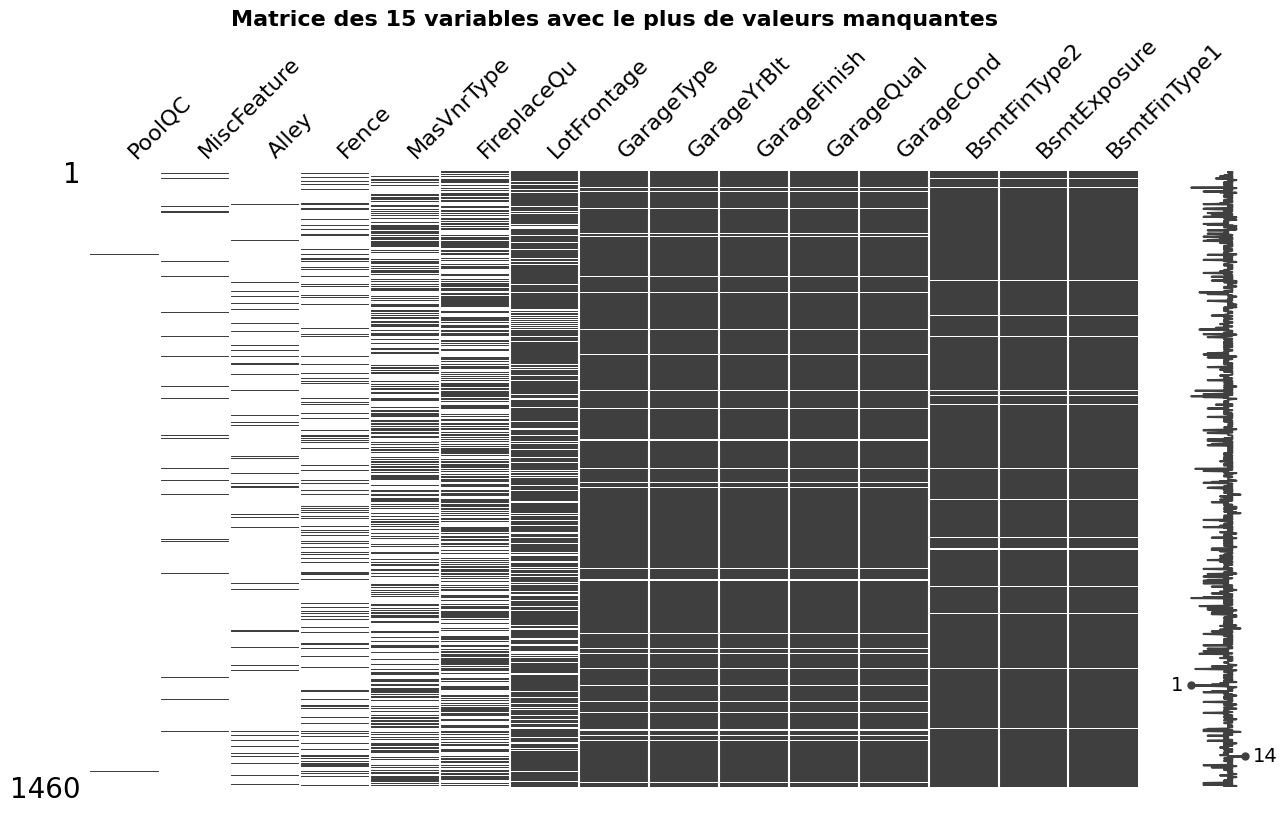

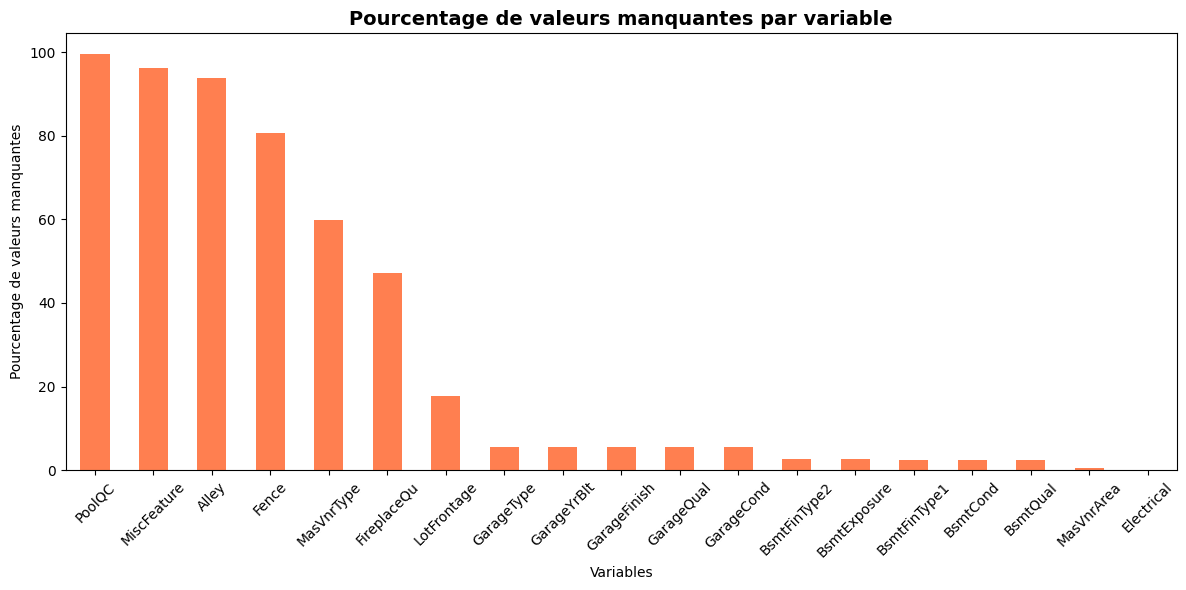

2025-07-30 20:28:06.206 | INFO     | __main__:<module>:49 - Analyse des valeurs manquantes terminée. 19 variables avec des valeurs manquantes



Résumé des valeurs manquantes:
Total de cellules manquantes: 7,829
Pourcentage total de données manquantes: 6.62%


In [58]:
print("\n=== ANALYSE DES VALEURS MANQUANTES ===")

# Calcul des valeurs manquantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame(
    {"Valeurs_manquantes": missing_data, "Pourcentage": missing_percent}
)
missing_df = missing_df[missing_df["Valeurs_manquantes"] > 0].sort_values(
    "Pourcentage", ascending=False
)

print(f"Nombre total de variables avec des valeurs manquantes: {len(missing_df)}")
print("\nTop 15 des variables avec le plus de valeurs manquantes:")
print(missing_df.head(15))

# Visualisation des valeurs manquantes avec missingno (limité aux 15 premières variables concernées)
if len(missing_df) > 0:
    plt.figure(figsize=FIGSIZE_LARGE)
    msno.matrix(df[missing_df.head(15).index], figsize=FIGSIZE_LARGE)
    plt.title("Matrice des 15 variables avec le plus de valeurs manquantes", fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()

    # Graphique en barres des valeurs manquantes
    if len(missing_df) <= 20:
        plt.figure(figsize=FIGSIZE_MEDIUM)
        missing_df.head(20)["Pourcentage"].plot(kind="bar", color="coral")
        plt.title(
            "Pourcentage de valeurs manquantes par variable",
            fontsize=14,
            fontweight="bold",
        )
        plt.xlabel("Variables")
        plt.ylabel("Pourcentage de valeurs manquantes")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Analyse des patterns de valeurs manquantes
total_missing = df.isnull().sum().sum()
total_cells = np.prod(df.shape)
missing_percentage_total = (total_missing / total_cells) * 100

print("\nRésumé des valeurs manquantes:")
print(f"Total de cellules manquantes: {total_missing:,}")
print(f"Pourcentage total de données manquantes: {missing_percentage_total:.2f}%")

logger.info(
    f"Analyse des valeurs manquantes terminée. {len(missing_df)} variables avec des valeurs manquantes"
)


L’analyse montre que 19 variables contiennent des valeurs manquantes. Au total, 7 829 cellules sont manquantes, ce qui représente environ 6,82 % de l’ensemble des données.

- Variables très affectées : Quatre variables (`PoolQC`, `MiscFeature`, `Alley`, `Fence`) ont un taux de valeurs manquantes extrêmement élevé (plus de 80%). Dans la plupart des cas, une valeur manquante ici signifie l'absence de la caractéristique (par exemple, pas de piscine). Cette information est en soi une caractéristique utile.
  
- Variables modérément affectées : `LotFrontage` a 16.7% de valeurs manquantes, ce qui nécessitera une stratégie d'imputation réfléchie. D'autres, comme les caractéristiques du garage (`GarageType`, `GarageFinish`, etc.), présentent des manques qui sont probablement liés à l'absence de garage.
  
- Visualisation : La matrice `missingno` confirme ces observations. Les lignes horizontales blanches indiquent des observations où plusieurs informations sont manquantes simultanément, souvent pour des caractéristiques liées (par exemple, toutes les variables du garage sont manquantes ensemble).

Cette analyse est importante. Nous devrons traiter ces manques de manière appropriée, en distinguant les vraies valeurs manquantes de celles qui signifient une absence de caractéristique.

### Analyse approfondie de la variable cible (`SalePrice`)

La variable `SalePrice` représente le prix de vente des biens immobiliers et constitue la cible à prédire dans le cadre de ce projet. Il est important d’analyser sa distribution, sa moyenne, sa médiane, et la présence de valeurs extrêmes. Cela permet de savoir si des transformations (comme une normalisation ou une transformation logarithmique) sont nécessaires pour améliorer la performance des modèles de régression.


=== ANALYSE DE LA VARIABLE CIBLE ===
Statistiques pour SalePrice:
Moyenne: $180,921.20
Médiane: $163,000.00
Écart-type: $79,442.50
Minimum: $34,900.00
Maximum: $755,000.00
Skewness (asymétrie): 1.881
Kurtosis (aplatissement): 6.510

Test de normalité (D'Agostino):
Statistique: 610.836, p-value: 0.000000
Distribution normale: Non (α = 0.05)


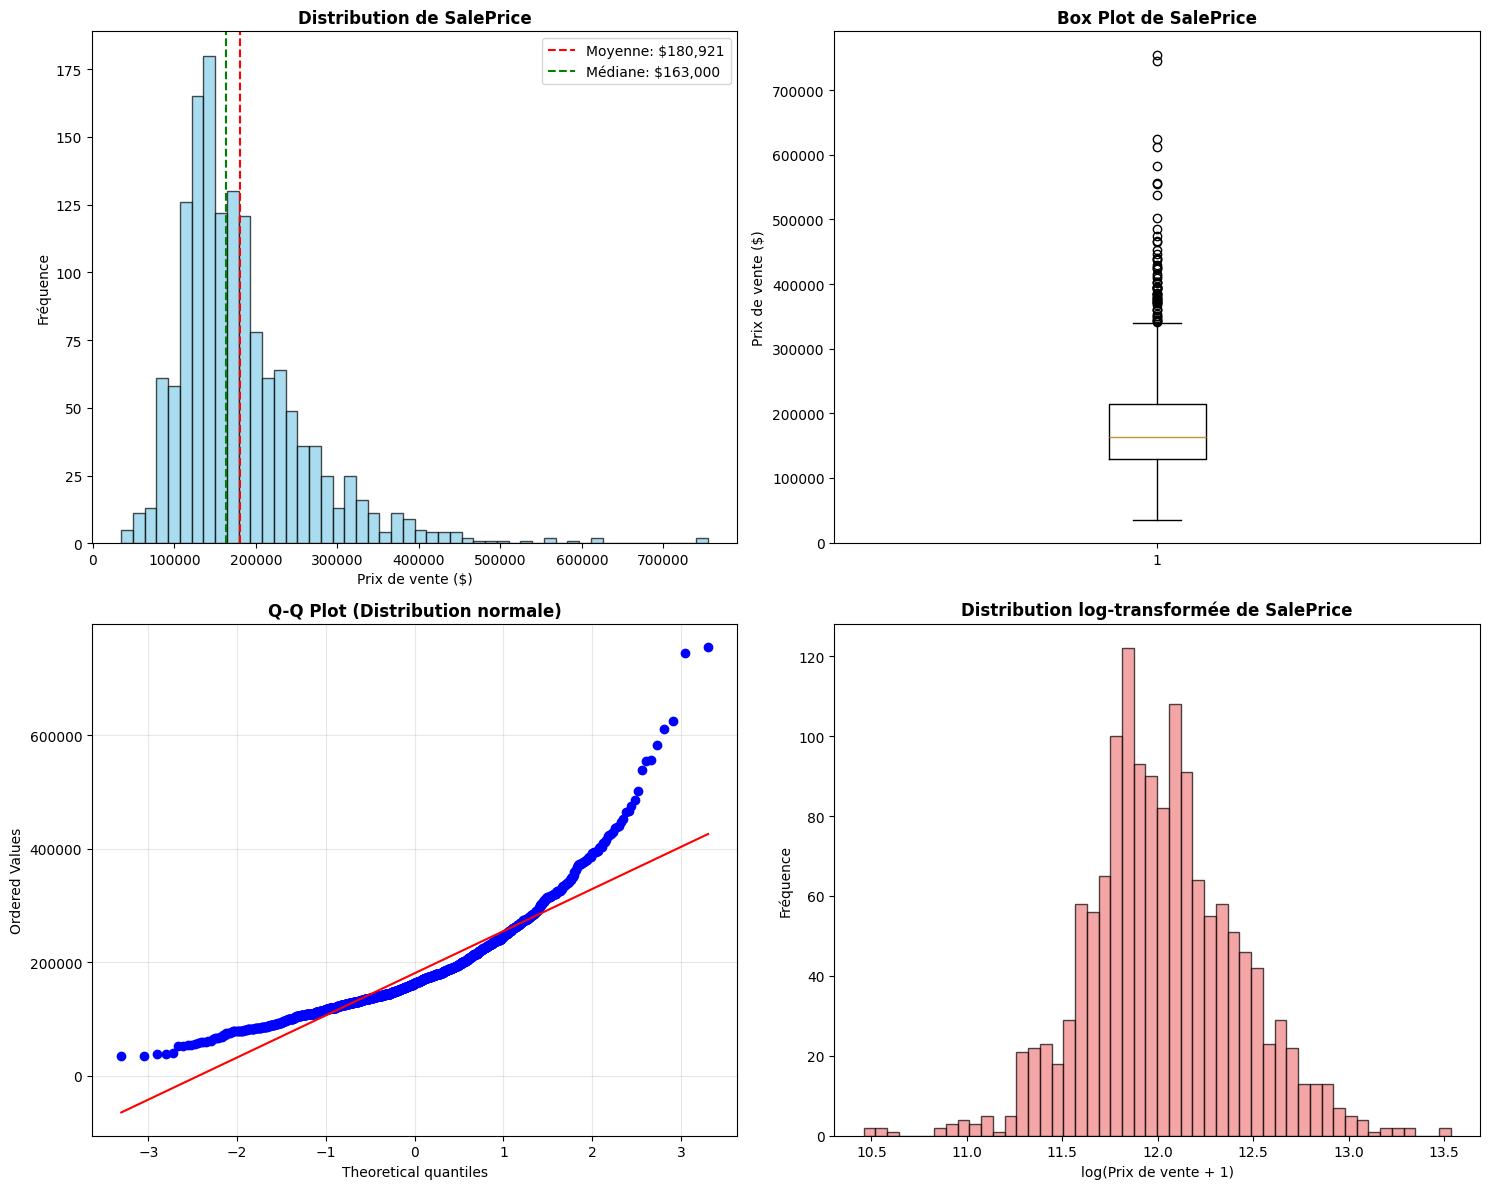

2025-07-30 20:28:08.131 | INFO     | __main__:<module>:100 - Analyse de la variable cible terminée. Skewness: 1.881



Analyse des quartiles:
Q1 (25%): $129,975.00
Q3 (75%): $214,000.00
IQR: $84,025.00
Borne inférieure pour outliers: $3,937.50
Borne supérieure pour outliers: $340,037.50
Nombre d'outliers détectés: 61 (4.18%)


In [59]:
print("\n=== ANALYSE DE LA VARIABLE CIBLE ===")

if TARGET_VARIABLE in df.columns:
    target_data = df[TARGET_VARIABLE].dropna()

    # Statistiques descriptives détaillées
    print(f"Statistiques pour {TARGET_VARIABLE}:")
    print(f"Moyenne: ${target_data.mean():,.2f}")
    print(f"Médiane: ${target_data.median():,.2f}")
    print(f"Écart-type: ${target_data.std():,.2f}")
    print(f"Minimum: ${target_data.min():,.2f}")
    print(f"Maximum: ${target_data.max():,.2f}")
    print(f"Skewness (asymétrie): {skew(target_data):.3f}")
    print(f"Kurtosis (aplatissement): {kurtosis(target_data):.3f}")

    # Test de normalité
    stat, p_value = normaltest(target_data)
    print("\nTest de normalité (D'Agostino):")
    print(f"Statistique: {stat:.3f}, p-value: {p_value:.6f}")
    print(f"Distribution normale: {'Non' if p_value < 0.05 else 'Oui'} (α = 0.05)")

    # Visualisations de la variable cible
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Histogramme
    axes[0, 0].hist(target_data, bins=50, alpha=0.7, color="skyblue", edgecolor="black")
    axes[0, 0].set_title(f"Distribution de {TARGET_VARIABLE}", fontweight="bold")
    axes[0, 0].set_xlabel("Prix de vente ($)")
    axes[0, 0].set_ylabel("Fréquence")
    axes[0, 0].axvline(
        target_data.mean(),
        color="red",
        linestyle="--",
        label=f"Moyenne: ${target_data.mean():,.0f}",
    )
    axes[0, 0].axvline(
        target_data.median(),
        color="green",
        linestyle="--",
        label=f"Médiane: ${target_data.median():,.0f}",
    )
    axes[0, 0].legend()

    # Box plot
    axes[0, 1].boxplot(target_data, vert=True)
    axes[0, 1].set_title(f"Box Plot de {TARGET_VARIABLE}", fontweight="bold")
    axes[0, 1].set_ylabel("Prix de vente ($)")

    # Q-Q plot
    stats.probplot(target_data, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title("Q-Q Plot (Distribution normale)", fontweight="bold")
    axes[1, 0].grid(True, alpha=0.3)

    # Distribution log-transformée
    log_target = np.log1p(target_data)
    axes[1, 1].hist(
        log_target, bins=50, alpha=0.7, color="lightcoral", edgecolor="black"
    )
    axes[1, 1].set_title(
        f"Distribution log-transformée de {TARGET_VARIABLE}", fontweight="bold"
    )
    axes[1, 1].set_xlabel("log(Prix de vente + 1)")
    axes[1, 1].set_ylabel("Fréquence")

    plt.tight_layout()
    plt.show()

    # Analyse des quartiles et outliers
    Q1 = target_data.quantile(0.25)
    Q3 = target_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = target_data[(target_data < lower_bound) | (target_data > upper_bound)]

    print("\nAnalyse des quartiles:")
    print(f"Q1 (25%): ${Q1:,.2f}")
    print(f"Q3 (75%): ${Q3:,.2f}")
    print(f"IQR: ${IQR:,.2f}")
    print(f"Borne inférieure pour outliers: ${lower_bound:,.2f}")
    print(f"Borne supérieure pour outliers: ${upper_bound:,.2f}")
    print(
        f"Nombre d'outliers détectés: {len(outliers)} ({len(outliers)/len(target_data)*100:.2f}%)"
    )

    # Sauvegarde des statistiques de la variable cible
    target_stats = {
        "mean": target_data.mean(),
        "median": target_data.median(),
        "std": target_data.std(),
        "min": target_data.min(),
        "max": target_data.max(),
        "skewness": skew(target_data),
        "kurtosis": kurtosis(target_data),
        "outliers_count": len(outliers),
        "outliers_percentage": len(outliers) / len(target_data) * 100,
    }

    logger.info(
        f"Analyse de la variable cible terminée. Skewness: {skew(target_data):.3f}"
    )

else:
    logger.error(f"Variable cible '{TARGET_VARIABLE}' non trouvée")

L’analyse de `SalePrice` fait ressortir plusieurs points importants :

- Distribution asymétrique : L’histogramme ainsi que les mesures de skewness (1.881) et de kurtosis (6.510) montrent que la distribution est étalée vers la droite. La moyenne (180 921 \$) est supérieure à la médiane (163 000 \$), ce qui indique que quelques biens très chers tirent la moyenne vers le haut.

- Non-normalité : Le test de normalité de D’Agostino renvoie une p-value très faible (< 0.05), ce qui rejette l’hypothèse d’une distribution normale. Le **Q-Q plot** (graphique quantile-quantile) permet de visualiser cet écart : les points s’éloignent nettement de la ligne théorique, surtout dans les extrêmes.

- Transformation logarithmique : Appliquer une transformation logarithmique sur les prix permet de rendre la distribution plus symétrique et plus proche d’une distribution normale. Cela facilite l’utilisation de modèles comme la régression linéaire, qui supposent souvent une distribution gaussienne de la variable cible.

- Valeurs extrêmes (outliers) : L’analyse des outliers a été faite à l’aide de la méthode de l’**IQR** (Interquartile Range, ou intervalle interquartile), qui identifie comme valeurs extrêmes les observations situées en dehors de l’intervalle \[Q1 - 1.5 × IQR ; Q3 + 1.5 × IQR\]. Cette méthode a permis de détecter 61 outliers, soit environ 4.2 % des données, avec des prix supérieurs à 340 037,50 $.

La distribution de `SalePrice` est trop asymétrique pour être utilisée directement. Les outliers identifiés en sont en partie responsables. Une transformation logarithmique est donc nécessaire pour stabiliser la variance et améliorer la qualité des futurs modèles de prédiction.

### Analyse des variables numériques

Après avoir étudié la variable cible, nous nous tournons vers les variables explicatives numériques. L'objectif est d'identifier celles qui ont le plus d'influence sur le prix de vente. Pour cela, nous allons calculer et visualiser les corrélations entre chaque variable numérique et `SalePrice`.


=== ANALYSE DES VARIABLES NUMÉRIQUES ===
Nombre de variables numériques à analyser: 37

Top 15 des variables les plus corrélées avec SalePrice:
OverallQual: 0.791 (|0.791|)
GrLivArea: 0.709 (|0.709|)
GarageCars: 0.640 (|0.640|)
GarageArea: 0.623 (|0.623|)
TotalBsmtSF: 0.614 (|0.614|)
1stFlrSF: 0.606 (|0.606|)
FullBath: 0.561 (|0.561|)
TotRmsAbvGrd: 0.534 (|0.534|)
YearBuilt: 0.523 (|0.523|)
YearRemodAdd: 0.507 (|0.507|)
GarageYrBlt: 0.486 (|0.486|)
MasVnrArea: 0.477 (|0.477|)
Fireplaces: 0.467 (|0.467|)
BsmtFinSF1: 0.386 (|0.386|)
LotFrontage: 0.352 (|0.352|)


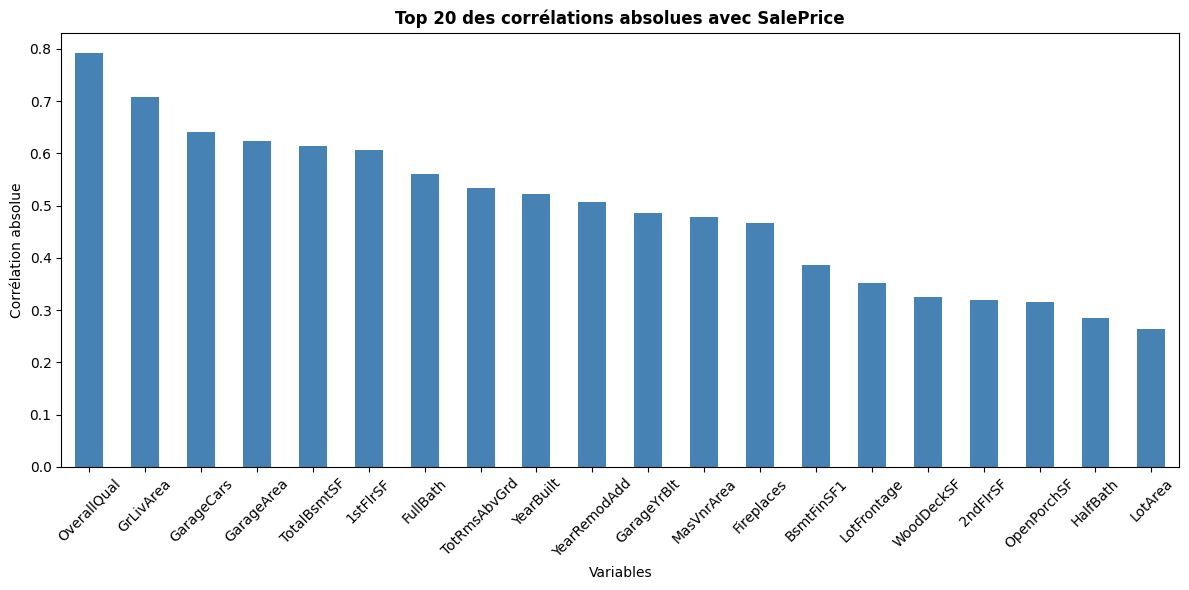

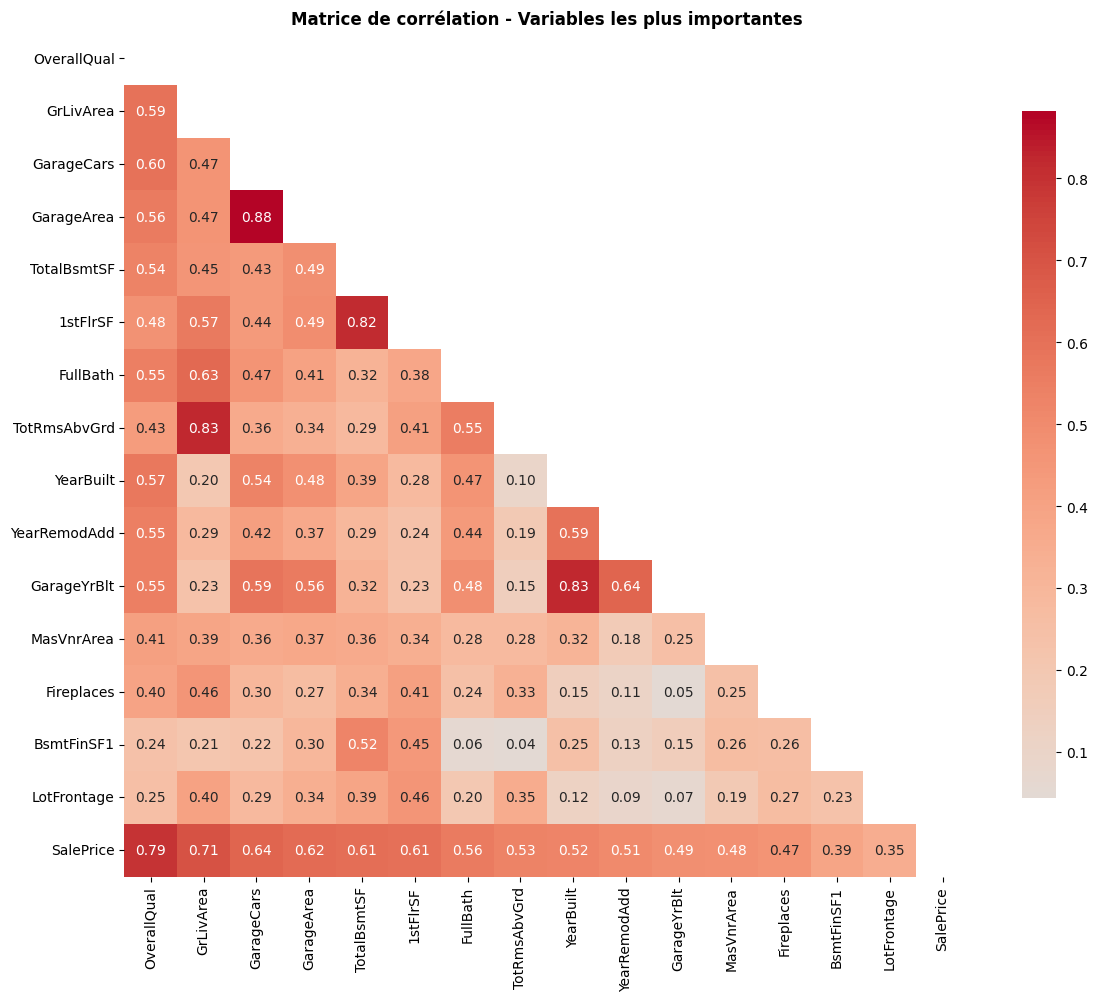

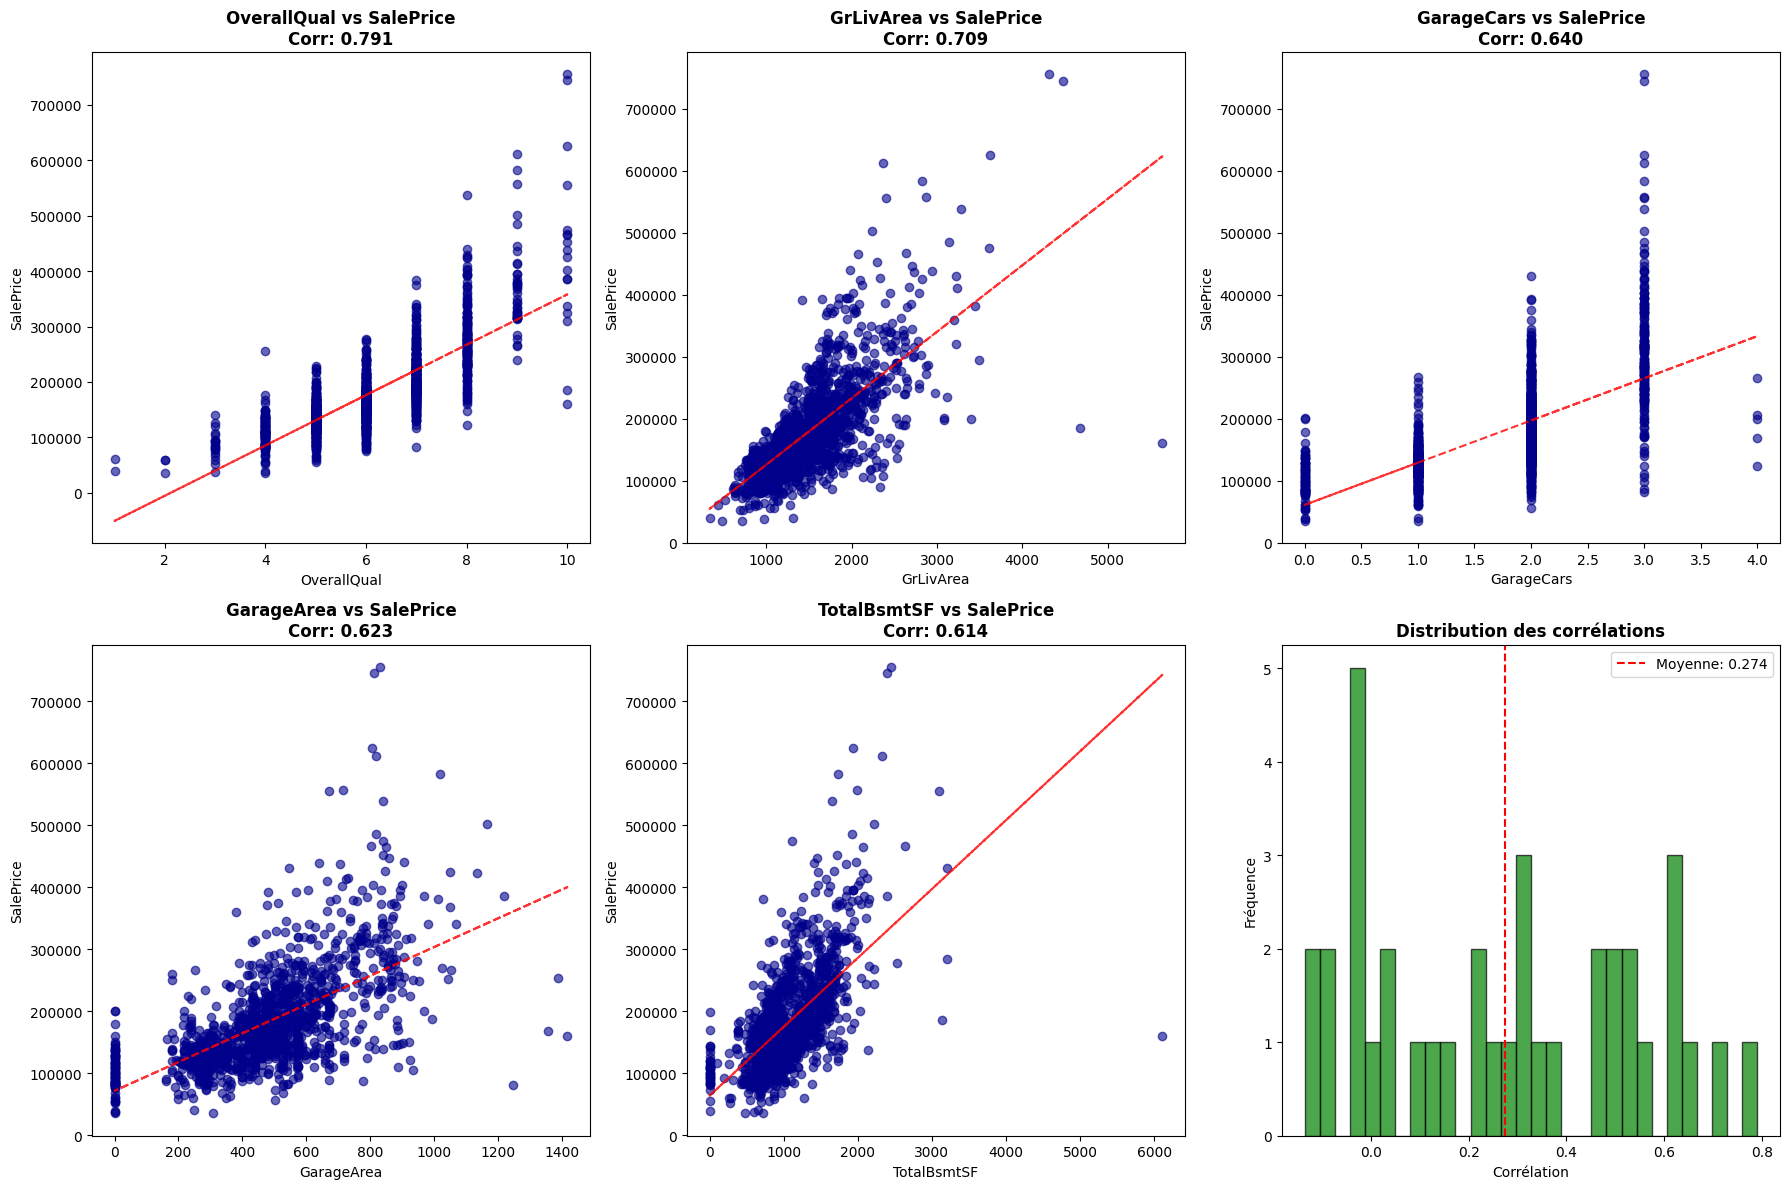

2025-07-30 20:28:19.311 | INFO     | __main__:<module>:98 - Analyse des variables numériques terminée. Variable la plus corrélée: OverallQual (0.791)



Statistiques descriptives des variables les plus corrélées:
       OverallQual    GrLivArea   GarageCars   GarageArea  TotalBsmtSF
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000
mean      6.099315  1515.463699     1.767123   472.980137  1057.429452
std       1.382997   525.480383     0.747315   213.804841   438.705324
min       1.000000   334.000000     0.000000     0.000000     0.000000
25%       5.000000  1129.500000     1.000000   334.500000   795.750000
50%       6.000000  1464.000000     2.000000   480.000000   991.500000
75%       7.000000  1776.750000     2.000000   576.000000  1298.250000
max      10.000000  5642.000000     4.000000  1418.000000  6110.000000


In [60]:
print("\n=== ANALYSE DES VARIABLES NUMÉRIQUES ===")

# Sélection des variables numériques (excluant la variable cible)
numeric_features = [col for col in numeric_vars if col != TARGET_VARIABLE]
print(f"Nombre de variables numériques à analyser: {len(numeric_features)}")

# Calcul des corrélations avec la variable cible
if TARGET_VARIABLE in df.columns:
    correlations = (
        df[numeric_features + [TARGET_VARIABLE]]
        .corr()[TARGET_VARIABLE]
        .drop(TARGET_VARIABLE)
    )
    correlations_abs = correlations.abs().sort_values(ascending=False)

    print(f"\nTop 15 des variables les plus corrélées avec {TARGET_VARIABLE}:")
    for var, corr in correlations_abs.head(15).items():
        print(f"{var}: {correlations[var]:.3f} (|{corr:.3f}|)")

    # Visualisation des corrélations
    plt.figure(figsize=FIGSIZE_MEDIUM)
    correlations_abs.head(20).plot(kind="bar", color="steelblue")
    plt.title(
        f"Top 20 des corrélations absolues avec {TARGET_VARIABLE}", fontweight="bold"
    )
    plt.xlabel("Variables")
    plt.ylabel("Corrélation absolue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Matrice de corrélation pour les variables les plus importantes
    top_vars = correlations_abs.head(15).index.tolist() + [TARGET_VARIABLE]
    corr_matrix = df[top_vars].corr()

    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        cmap="coolwarm",
        center=0,
        square=True,
        fmt=".2f",
        cbar_kws={"shrink": 0.8},
    )
    plt.title(
        "Matrice de corrélation - Variables les plus importantes", fontweight="bold"
    )
    plt.tight_layout()
    plt.show()

    # Analyse détaillée des variables les plus corrélées
    top_5_vars = correlations_abs.head(5).index.tolist()

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for i, var in enumerate(top_5_vars):
        if i < 5:
            # Scatter plot
            axes[i].scatter(df[var], df[TARGET_VARIABLE], alpha=0.6, color="darkblue")
            axes[i].set_xlabel(var)
            axes[i].set_ylabel(TARGET_VARIABLE)
            axes[i].set_title(
                f"{var} vs {TARGET_VARIABLE}\nCorr: {correlations[var]:.3f}",
                fontweight="bold",
            )

            # Ligne de tendance
            z = np.polyfit(df[var].dropna(), df[TARGET_VARIABLE][df[var].notna()], 1)
            p = np.poly1d(z)
            axes[i].plot(df[var], p(df[var]), "r--", alpha=0.8)

    # Distribution des corrélations
    axes[5].hist(
        correlations.values, bins=30, alpha=0.7, color="green", edgecolor="black"
    )
    axes[5].set_title("Distribution des corrélations", fontweight="bold")
    axes[5].set_xlabel("Corrélation")
    axes[5].set_ylabel("Fréquence")
    axes[5].axvline(
        correlations.mean(),
        color="red",
        linestyle="--",
        label=f"Moyenne: {correlations.mean():.3f}",
    )
    axes[5].legend()

    plt.tight_layout()
    plt.show()

    # Statistiques des variables numériques importantes
    print("\nStatistiques descriptives des variables les plus corrélées:")
    print(df[top_5_vars].describe())

    logger.info(
        f"Analyse des variables numériques terminée. Variable la plus corrélée: {correlations_abs.index[0]} ({correlations_abs.iloc[0]:.3f})"
    )

else:
    logger.error(
        f"Impossible d'analyser les corrélations sans la variable cible '{TARGET_VARIABLE}'"
    )

L'analyse des relations entre les variables numériques et le prix de vente (`SalePrice`) montre que la qualité globale (`OverallQual`) est de loin le facteur le plus influent, avec une forte corrélation positive de 0.79. Juste derrière, la surface habitable (`GrLivArea`) affiche également une corrélation très élevée de 0.71. Les nuages de points confirment que ces relations sont non seulement fortes mais aussi linéaires. En effet, à mesure que la qualité ou la surface augmentent, le prix tend à augmenter de manière prévisible.

Il est également important de noter la présence de multicolinéarité, où certaines variables prédictives sont fortement corrélées entre elles. Par exemple, la taille du garage (`GarageArea`) et sa capacité en voitures (`GarageCars`) sont corrélées à 0.88. De même, la surface du sous-sol (`TotalBsmtSF`) et celle du rez-de-chaussée (`1stFlrSF`) sont liées à 0.82. Cette redondance d'information est un point de vigilance pour la construction du modèle car elle peut rendre l'interprétation des coefficients plus complexe.

De manière générale, la distribution des corrélations est globalement positive, avec une moyenne de 0.274. Cela signifie que la plupart des caractéristiques mesurées contribuent à la valeur d'une maison. En conclusion, les variables comme `OverallQual` et `GrLivArea` sont essentielles pour construire notre modèle de prédiction.

### Analyse des variables catégorielles

Les caractéristiques non numériques, comme le quartier ou le type de fondation, jouent également un rôle crucial dans la détermination du prix d'une maison. Nous allons maintenant analyser ces variables catégorielles pour évaluer leur cardinalité (nombre de catégories uniques) et leur impact sur `SalePrice`. L'objectif est d'identifier les catégories qui créent les plus grandes variations de prix.


=== ANALYSE DES VARIABLES CATÉGORIELLES ===
Nombre de variables catégorielles: 43

Informations sur les variables catégorielles:
         Variable  Valeurs_uniques  Valeurs_manquantes  Pct_manquantes  \
8    Neighborhood               25                   0        0.000000   
16    Exterior2nd               16                   0        0.000000   
15    Exterior1st               15                   0        0.000000   
41       SaleType                9                   0        0.000000   
9      Condition1                9                   0        0.000000   
10     Condition2                8                   0        0.000000   
12     HouseStyle                8                   0        0.000000   
14       RoofMatl                8                   0        0.000000   
31     Functional                7                   0        0.000000   
25   BsmtFinType2                6                  38        2.602740   
26        Heating                6                   0  

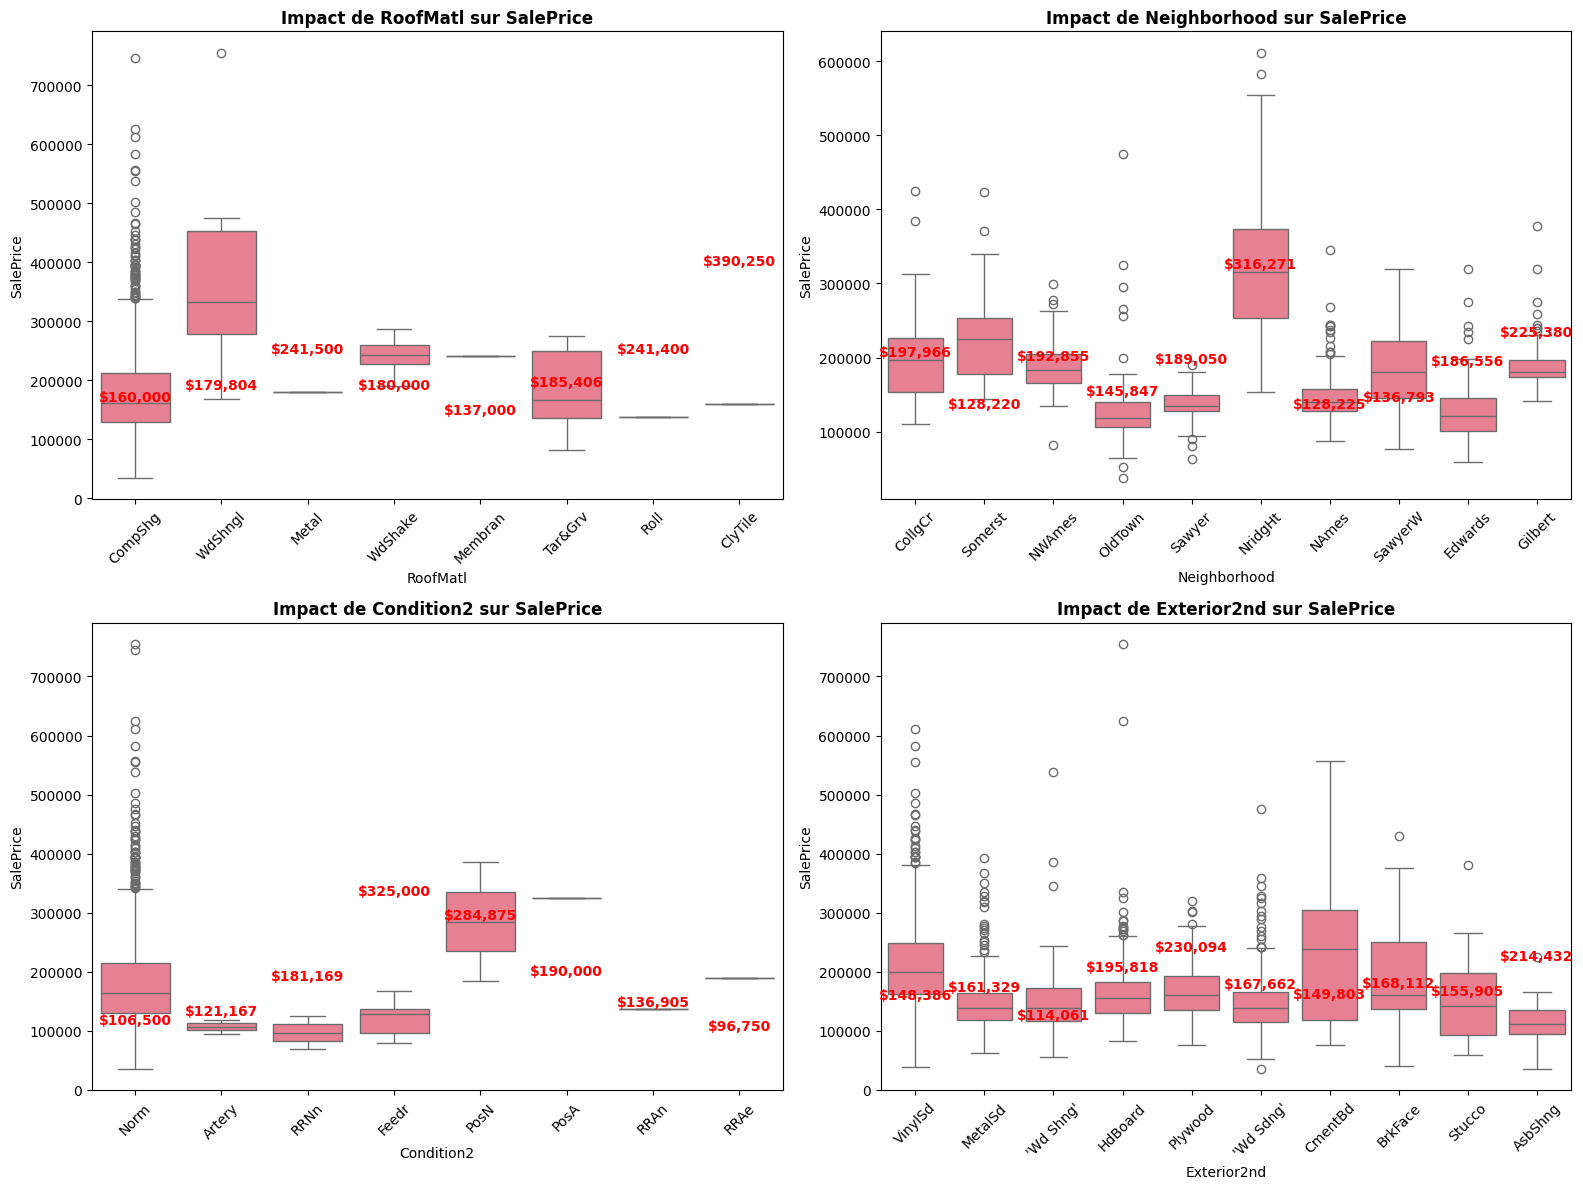

2025-07-30 20:28:23.335 | INFO     | __main__:<module>:135 - Analyse des variables catégorielles terminée. Variable la plus impactante: RoofMatl



Analyse détaillée de 'RoofMatl':
          count       mean    median        std     min     max
RoofMatl                                                       
WdShngl       6  390250.00  332500.0  206969.02  168500  755000
Membran       1  241500.00  241500.0        NaN  241500  241500
WdShake       5  241400.00  242000.0   36218.78  190000  287000
Tar&Grv      11  185406.36  167000.0   65430.14   82000  274970
Metal         1  180000.00  180000.0        NaN  180000  180000
CompShg    1434  179803.68  162000.0   77722.39   34900  745000
ClyTile       1  160000.00  160000.0        NaN  160000  160000
Roll          1  137000.00  137000.0        NaN  137000  137000


In [61]:
print("\n=== ANALYSE DES VARIABLES CATÉGORIELLES ===")

print(f"Nombre de variables catégorielles: {len(categorical_vars)}")

# Analyse de la cardinalité des variables catégorielles
categorical_info = []
for var in categorical_vars:
    unique_count = df[var].nunique()
    missing_count = df[var].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    most_frequent = df[var].mode().iloc[0] if len(df[var].mode()) > 0 else "N/A"
    most_frequent_count = (
        df[var].value_counts().iloc[0] if len(df[var].value_counts()) > 0 else 0
    )

    categorical_info.append(
        {
            "Variable": var,
            "Valeurs_uniques": unique_count,
            "Valeurs_manquantes": missing_count,
            "Pct_manquantes": missing_pct,
            "Valeur_plus_frequente": most_frequent,
            "Freq_max": most_frequent_count,
        }
    )

categorical_df = pd.DataFrame(categorical_info)
categorical_df = categorical_df.sort_values("Valeurs_uniques", ascending=False)

print("\nInformations sur les variables catégorielles:")
print(categorical_df)

# Analyse de l'impact des variables catégorielles sur la variable cible
if TARGET_VARIABLE in df.columns:
    # Sélection des variables catégorielles avec peu de valeurs manquantes et cardinalité raisonnable
    good_categorical = categorical_df[
        (categorical_df["Pct_manquantes"] < 50)
        & (categorical_df["Valeurs_uniques"] <= 25)
        & (categorical_df["Valeurs_uniques"] >= 2)
    ]["Variable"].tolist()

    print(
        f"\nVariables catégorielles sélectionnées pour l'analyse ({len(good_categorical)}): {good_categorical}"
    )

    # Analyse de l'impact sur la variable cible
    if len(good_categorical) > 0:
        # Calcul des moyennes par catégorie pour chaque variable
        categorical_impact = []

        for var in good_categorical[:8]:  # Limiter à 8 variables pour la visualisation
            if var in df.columns:
                group_stats = (
                    df.groupby(var)[TARGET_VARIABLE]
                    .agg(["mean", "count", "std"])
                    .reset_index()
                )
                group_stats = group_stats.sort_values("mean", ascending=False)

                # Calculer la variance entre les groupes
                overall_mean = df[TARGET_VARIABLE].mean()
                variance_between = sum(
                    group_stats["count"] * (group_stats["mean"] - overall_mean) ** 2
                )

                categorical_impact.append(
                    {
                        "Variable": var,
                        "Variance_entre_groupes": variance_between,
                        "Nb_categories": len(group_stats),
                        "Prix_min": group_stats["mean"].min(),
                        "Prix_max": group_stats["mean"].max(),
                        "Ecart_prix": group_stats["mean"].max()
                        - group_stats["mean"].min(),
                    }
                )

        impact_df = pd.DataFrame(categorical_impact)
        impact_df = impact_df.sort_values("Ecart_prix", ascending=False)

        print("\nImpact des variables catégorielles sur le prix:")
        print(impact_df)

        # Visualisation des variables catégorielles les plus impactantes
        top_categorical = impact_df.head(4)["Variable"].tolist()

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.ravel()

        for i, var in enumerate(top_categorical):
            if i < 4 and var in df.columns:
                # Box plot par catégorie
                df_clean = df[[var, TARGET_VARIABLE]].dropna()

                # Limiter le nombre de catégories affichées si trop nombreuses
                top_categories = df_clean[var].value_counts().head(10).index
                df_plot = df_clean[df_clean[var].isin(top_categories)]

                sns.boxplot(data=df_plot, x=var, y=TARGET_VARIABLE, ax=axes[i])
                axes[i].set_title(
                    f"Impact de {var} sur {TARGET_VARIABLE}", fontweight="bold"
                )
                axes[i].tick_params(axis="x", rotation=45)

                # Ajouter les moyennes
                means = df_plot.groupby(var)[TARGET_VARIABLE].mean()
                for j, (category, mean_val) in enumerate(means.items()):
                    axes[i].text(
                        j,
                        mean_val,
                        f"${mean_val:,.0f}",
                        ha="center",
                        va="bottom",
                        fontweight="bold",
                        color="red",
                    )

        plt.tight_layout()
        plt.show()

        # Analyse détaillée de la variable catégorielle la plus impactante
        if len(top_categorical) > 0:
            most_important_cat = top_categorical[0]
            print(f"\nAnalyse détaillée de '{most_important_cat}':")

            detailed_stats = (
                df.groupby(most_important_cat)[TARGET_VARIABLE]
                .agg(["count", "mean", "median", "std", "min", "max"])
                .round(2)
            )
            detailed_stats = detailed_stats.sort_values("mean", ascending=False)

            print(detailed_stats)

            logger.info(
                f"Analyse des variables catégorielles terminée. Variable la plus impactante: {most_important_cat}"
            )

else:
    logger.error(
        f"Impossible d'analyser l'impact des variables catégorielles sans la variable cible '{TARGET_VARIABLE}'"
    )

L'analyse des 43 variables catégorielles montre que quelques-unes ont un impact majeur sur le prix. Bien que le matériau du toit (`RoofMatl`) présente le plus grand écart de prix en raison d'une catégorie de luxe très rare, le quartier (`Neighborhood`) est le facteur qui a globalement le plus d'influence. Il crée à lui seul une différence de prix moyen de plus de 230 000 $ entre les zones les plus chères et les moins chères.

Ces variables à fort impact sont donc essentielles pour le modèle de prédiction. Leur intégration représente certains défis. Il faudra gérer la haute cardinalité de variables comme `Neighborhood` et les nombreuses valeurs manquantes dans d'autres. Une stratégie de prétraitement efficace sera donc cruciale.

### Feature Engineering et création de nouvelles variables

Le feature engineering consiste à créer de nouvelles variables à partir de celles existantes pour améliorer la performance du modèle. En combinant ou transformant des caractéristiques, nous pouvons capturer des relations plus complexes et fournir des informations plus pertinentes au modèle. Nous allons ici créer des variables logiques comme l'âge de la maison, les surfaces totales ou des scores de qualité.


=== FEATURE ENGINEERING ===
Créé: HouseAge (âge de la maison)
Créé: YearsSinceRemod (années depuis rénovation)
Créé: TotalSF (surface totale) à partir de ['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF']
Créé: QualityScore (score de qualité combiné)
Créé: TotalBathrooms (nombre total de salles de bain) à partir de ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
Créé: HasGarage (présence d'un garage)
Créé: HasBasement (présence d'un sous-sol)
Créé: HasFireplace (présence d'une cheminée)
Créé: LivingAreaRatio (ratio surface habitable / terrain)

Nombre total de nouvelles variables créées: 9
Variables créées: ['HouseAge', 'YearsSinceRemod', 'TotalSF', 'QualityScore', 'TotalBathrooms', 'HasGarage', 'HasBasement', 'HasFireplace', 'LivingAreaRatio']

Statistiques des nouvelles variables:
          HouseAge  YearsSinceRemod       TotalSF  QualityScore  \
count  1460.000000      1460.000000   1460.000000   1460.000000   
mean     36.547945        22.950000   2567.048630     33.864384   
std   

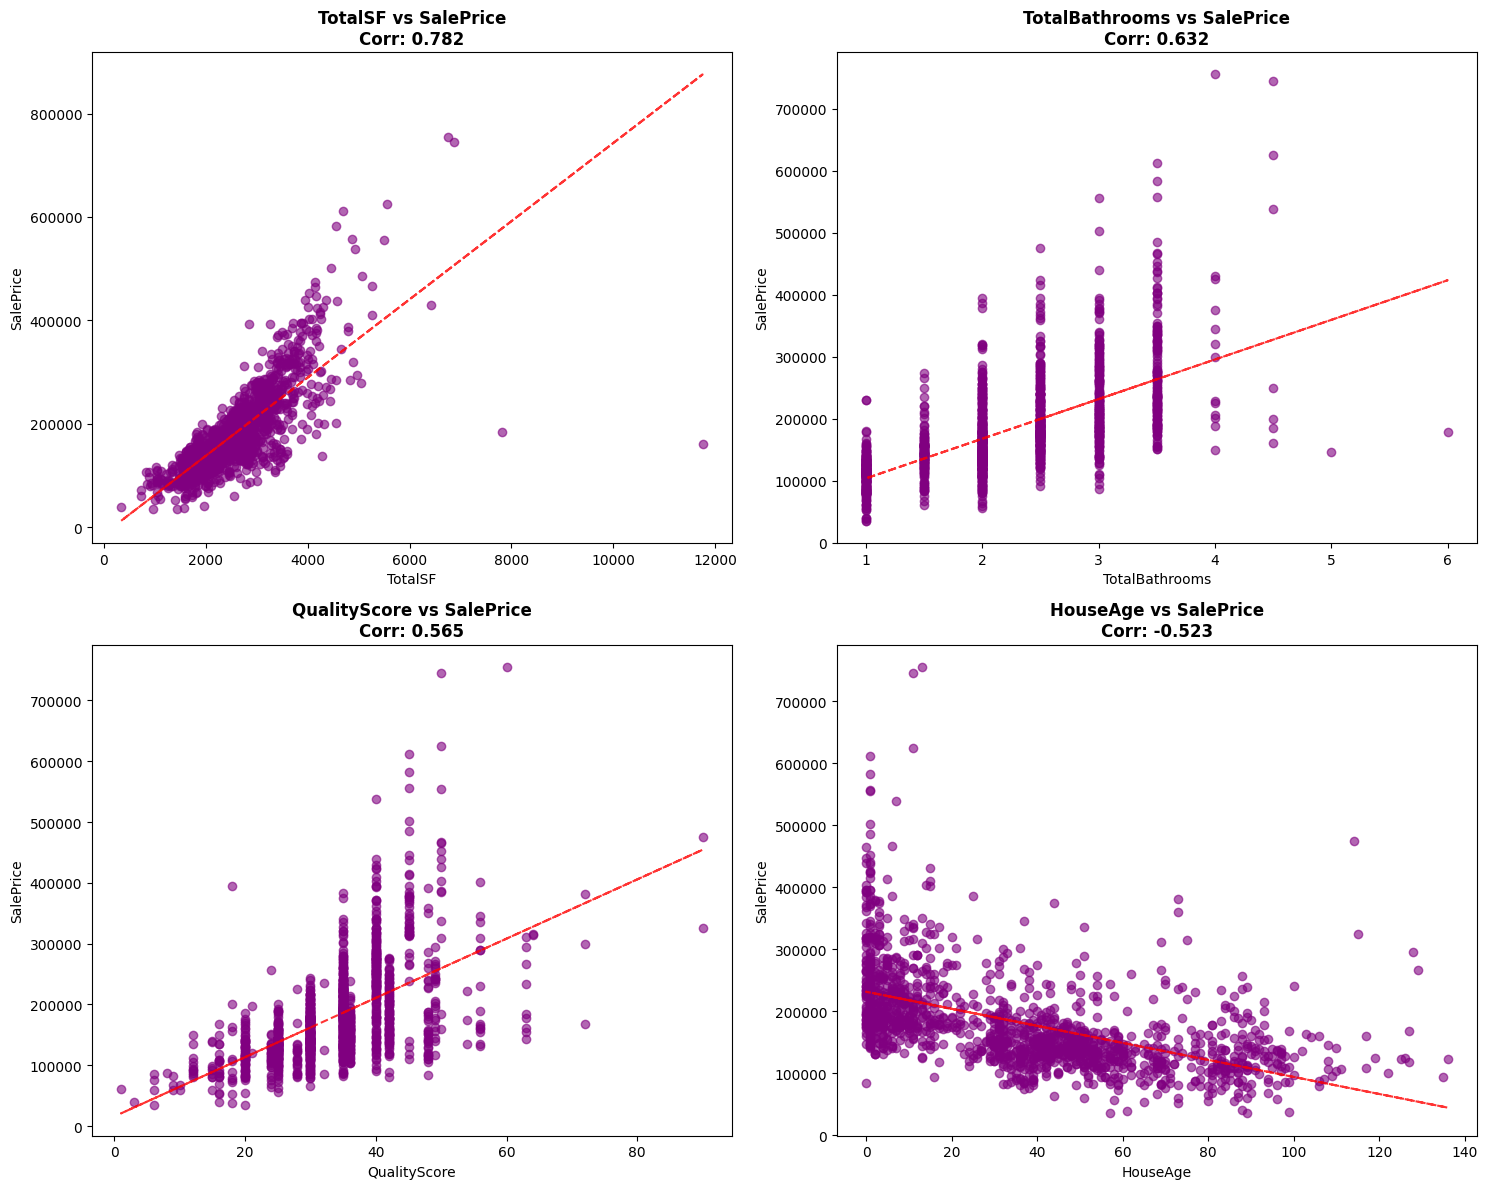

2025-07-30 20:28:24.764 | INFO     | __main__:<module>:133 - Feature engineering terminé. 9 nouvelles variables créées


In [62]:
print("\n=== FEATURE ENGINEERING ===")

# Créer une copie du dataframe pour le feature engineering
df_engineered = df.copy()
new_features = []

# 1. Variables d'âge
if "YearBuilt" in df.columns and "YrSold" in df.columns:
    df_engineered["HouseAge"] = df_engineered["YrSold"] - df_engineered["YearBuilt"]
    new_features.append("HouseAge")
    print("Créé: HouseAge (âge de la maison)")

if "YearRemodAdd" in df.columns and "YrSold" in df.columns:
    df_engineered["YearsSinceRemod"] = (
        df_engineered["YrSold"] - df_engineered["YearRemodAdd"]
    )
    new_features.append("YearsSinceRemod")
    print("Créé: YearsSinceRemod (années depuis rénovation)")

# 2. Variables de surface totale
surface_cols = ["1stFlrSF", "2ndFlrSF", "TotalBsmtSF"]
available_surface_cols = [col for col in surface_cols if col in df.columns]

if len(available_surface_cols) >= 2:
    df_engineered["TotalSF"] = df_engineered[available_surface_cols].sum(axis=1)
    new_features.append("TotalSF")
    print(f"Créé: TotalSF (surface totale) à partir de {available_surface_cols}")

# 3. Variables de qualité combinée
quality_cols = ["OverallQual", "OverallCond"]
available_quality_cols = [col for col in quality_cols if col in df.columns]

if len(available_quality_cols) == 2:
    df_engineered["QualityScore"] = (
        df_engineered["OverallQual"] * df_engineered["OverallCond"]
    )
    new_features.append("QualityScore")
    print("Créé: QualityScore (score de qualité combiné)")

# 4. Variables de nombre total de salles de bain
bathroom_cols = ["FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"]
available_bathroom_cols = [col for col in bathroom_cols if col in df.columns]

if len(available_bathroom_cols) >= 2:
    # Compter les demi-salles de bain comme 0.5
    total_baths = df_engineered[available_bathroom_cols].fillna(0)
    if "HalfBath" in available_bathroom_cols:
        total_baths["HalfBath"] = total_baths["HalfBath"] * 0.5
    if "BsmtHalfBath" in available_bathroom_cols:
        total_baths["BsmtHalfBath"] = total_baths["BsmtHalfBath"] * 0.5

    df_engineered["TotalBathrooms"] = total_baths.sum(axis=1)
    new_features.append("TotalBathrooms")
    print(
        f"Créé: TotalBathrooms (nombre total de salles de bain) à partir de {available_bathroom_cols}"
    )

# 5. Variables binaires pour la présence de certaines caractéristiques
if "GarageArea" in df.columns:
    df_engineered["HasGarage"] = (df_engineered["GarageArea"] > 0).astype(int)
    new_features.append("HasGarage")
    print("Créé: HasGarage (présence d'un garage)")

if "TotalBsmtSF" in df.columns:
    df_engineered["HasBasement"] = (df_engineered["TotalBsmtSF"] > 0).astype(int)
    new_features.append("HasBasement")
    print("Créé: HasBasement (présence d'un sous-sol)")

if "Fireplaces" in df.columns:
    df_engineered["HasFireplace"] = (df_engineered["Fireplaces"] > 0).astype(int)
    new_features.append("HasFireplace")
    print("Créé: HasFireplace (présence d'une cheminée)")

# 6. Variables de ratio
if "GrLivArea" in df.columns and "LotArea" in df.columns:
    df_engineered["LivingAreaRatio"] = df_engineered["GrLivArea"] / (
        df_engineered["LotArea"] + 1
    )  # +1 pour éviter division par 0
    new_features.append("LivingAreaRatio")
    print("Créé: LivingAreaRatio (ratio surface habitable / terrain)")

print(f"\nNombre total de nouvelles variables créées: {len(new_features)}")
print(f"Variables créées: {new_features}")

# Analyse des nouvelles variables
if len(new_features) > 0 and TARGET_VARIABLE in df_engineered.columns:
    print("\nStatistiques des nouvelles variables:")
    print(df_engineered[new_features].describe())

    # Corrélations des nouvelles variables avec la variable cible
    new_correlations = (
        df_engineered[new_features + [TARGET_VARIABLE]]
        .corr()[TARGET_VARIABLE]
        .drop(TARGET_VARIABLE)
    )
    new_correlations_abs = new_correlations.abs().sort_values(ascending=False)

    print(f"\nCorrélations des nouvelles variables avec {TARGET_VARIABLE}:")
    for var, corr in new_correlations_abs.items():
        print(f"{var}: {new_correlations[var]:.3f} (|{corr:.3f}|)")

    # Visualisation des nouvelles variables les plus corrélées
    if len(new_features) >= 4:
        top_new_vars = new_correlations_abs.head(4).index.tolist()

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.ravel()

        for i, var in enumerate(top_new_vars):
            axes[i].scatter(
                df_engineered[var],
                df_engineered[TARGET_VARIABLE],
                alpha=0.6,
                color="purple",
            )
            axes[i].set_xlabel(var)
            axes[i].set_ylabel(TARGET_VARIABLE)
            axes[i].set_title(
                f"{var} vs {TARGET_VARIABLE}\nCorr: {new_correlations[var]:.3f}",
                fontweight="bold",
            )

            # Ligne de tendance
            valid_data = df_engineered[[var, TARGET_VARIABLE]].dropna()
            if len(valid_data) > 1:
                z = np.polyfit(valid_data[var], valid_data[TARGET_VARIABLE], 1)
                p = np.poly1d(z)
                axes[i].plot(valid_data[var], p(valid_data[var]), "r--", alpha=0.8)

        plt.tight_layout()
        plt.show()

logger.info(
    f"Feature engineering terminé. {len(new_features)} nouvelles variables créées"
)

L'analyse du feature engineering révèle des insights intéressants sur les facteurs qui influencent le prix de vente des maisons.

- Variables les plus prédictives : La surface totale (`TotalSF`) est le facteur le plus déterminant avec une corrélation de 0.782. Ceci confirme que les acheteurs accordent de l'importance à l'espace disponible. Le nombre total de salles de bain (TotalBathrooms) suit avec une corrélation de 0.632, ce qui indique l'importance du confort.

- Impact de la qualité et de l'âge : Le score de qualité combiné (`QualityScore`) montre une corrélation positive modérée de 0.565. Cela suggère que l'état général de la propriété influence significativement sa valeur. À l'inverse, l'âge de la maison (`HouseAge`) présente une corrélation négative de -0.523, ce qui est logique car les maisons plus anciennes sont en génral moins chères.

- Variables moins impactantes : Le ratio surface habitable/terrain (`LivingAreaRatio`) n'influence pratiquement pas le prix, cela suggère que les acheteurs se concentrent davantage sur la surface absolue que sur l'optimisation de l'espace par rapport au terrain.

Ces nouvelles variables enrichissent considérablement le modèle en capturant des aspects essentiels de l'évaluation immobilière.


### Détection et analyse des outliers

Les outliers, ou valeurs aberrantes, sont des points de données qui s'écartent de manière significative du reste de l'échantillon. Ils peuvent fausser les résultats statistiques et nuire à la performance des modèles de régression.

Dans cette section, nous allons :

- Utiliser des méthodes statistiques comme l'intervalle interquartile (IQR) et le Z-score pour identifier les outliers dans nos variables les plus importantes.
  
- Visualiser l'impact de ces valeurs extrêmes sur la distribution des données.
  
- Analyser spécifiquement les outliers de notre variable cible, `SalePrice`, pour comprendre s'il s'agit d'erreurs de saisie ou de biens immobiliers vraiment exceptionnels.

Cette analyse est cruciale pour décider de la stratégie à adopter. Il faut déterminer s’il est préférable de supprimer, transformer ou conserver ces outliers pour la phase de modélisation.


=== DÉTECTION ET ANALYSE DES OUTLIERS ===
Variables sélectionnées pour l'analyse des outliers: ['OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'TotalBathrooms', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

Résumé de la détection d'outliers:
         Variable  Outliers_IQR  Outliers_ZScore  Pct_Outliers_IQR  \
4  TotalBathrooms           394                2             26.99   
6     TotalBsmtSF            61               10              4.18   
2       GrLivArea            31               16              2.12   
1         TotalSF            25               11              1.71   
5      GarageArea            21                7              1.44   
7        1stFlrSF            20               12              1.37   
3      GarageCars             5                0              0.34   
0     OverallQual             2                2              0.14   

   Lower_Bound  Upper_Bound  Min_Value  Max_Value  
4         1.25         3.25        1.0        6.0  
6        42.00      

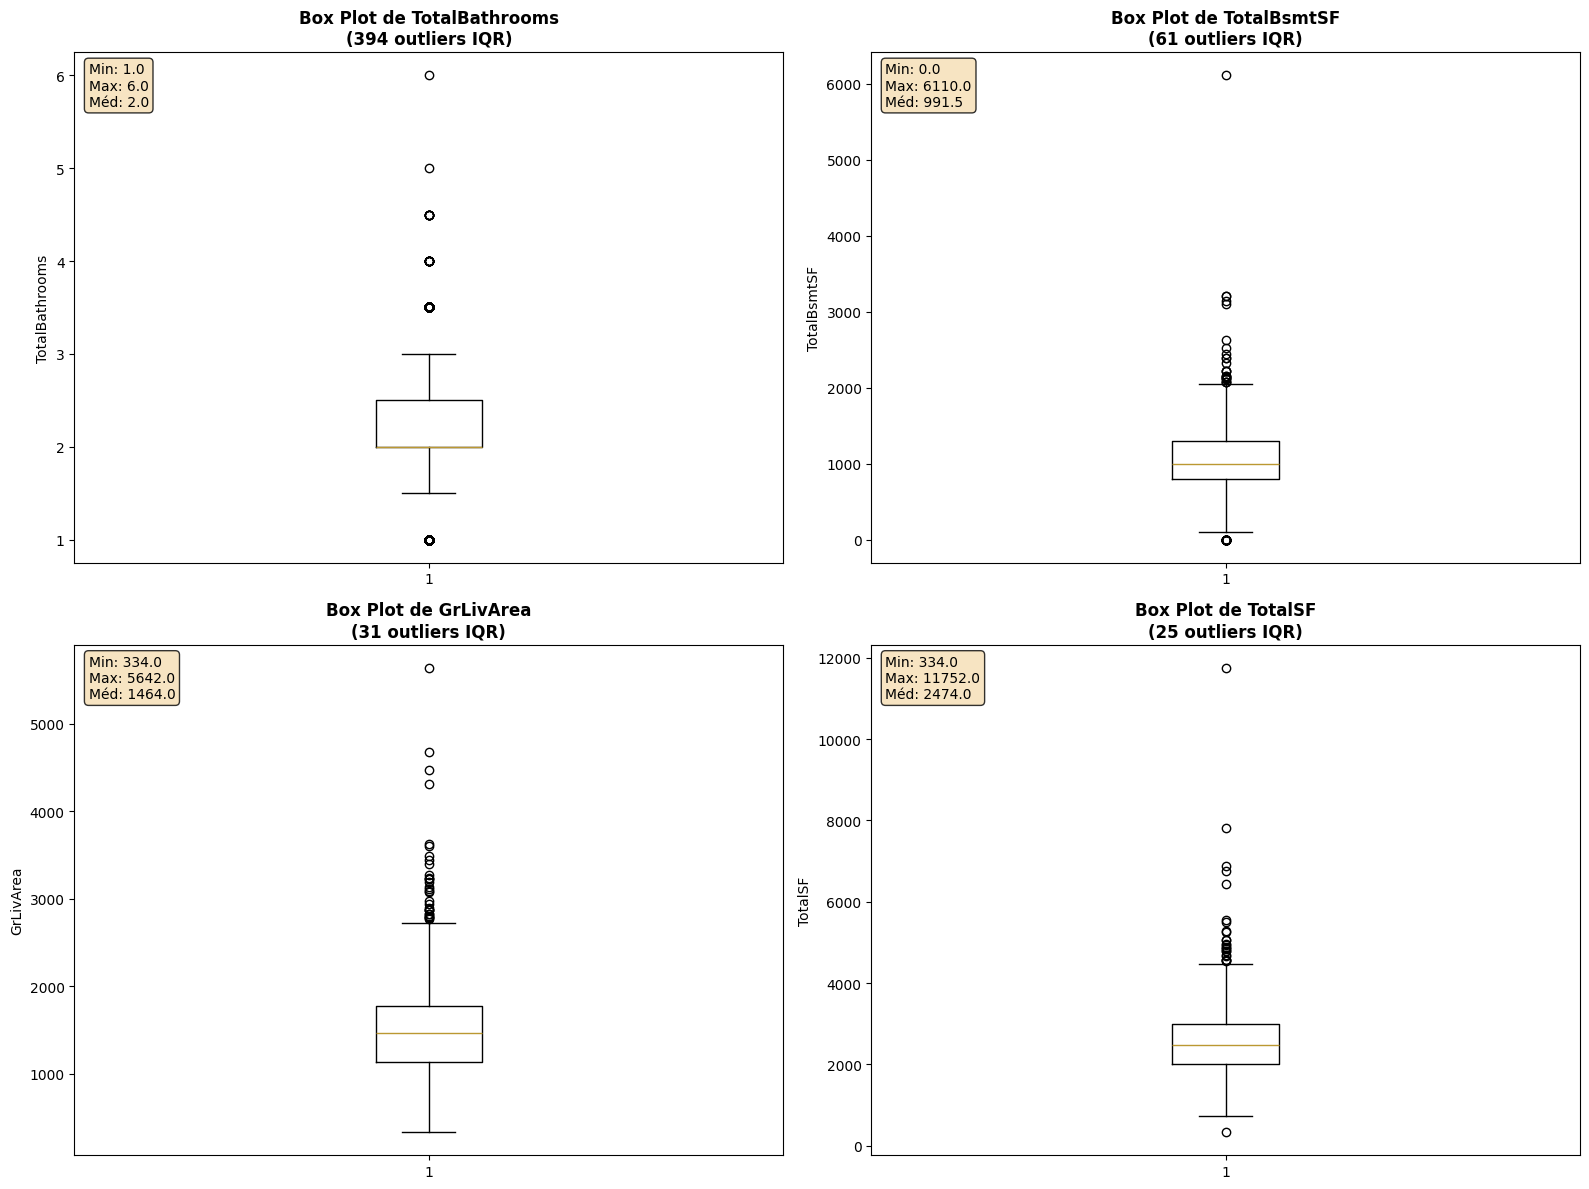


Analyse des outliers pour SalePrice:
Outliers IQR: 61 (4.18%)
Outliers Z-score: 22 (1.51%)
Bornes IQR: [3,938, 340,038]

Exemples d'outliers de prix (méthode IQR):
Index 11: $345,000
Index 53: $385,000
Index 58: $438,780
Index 112: $383,970
Index 151: $372,402
Index 161: $412,500
Index 178: $501,837
Index 185: $475,000
Index 224: $386,250
Index 231: $403,000


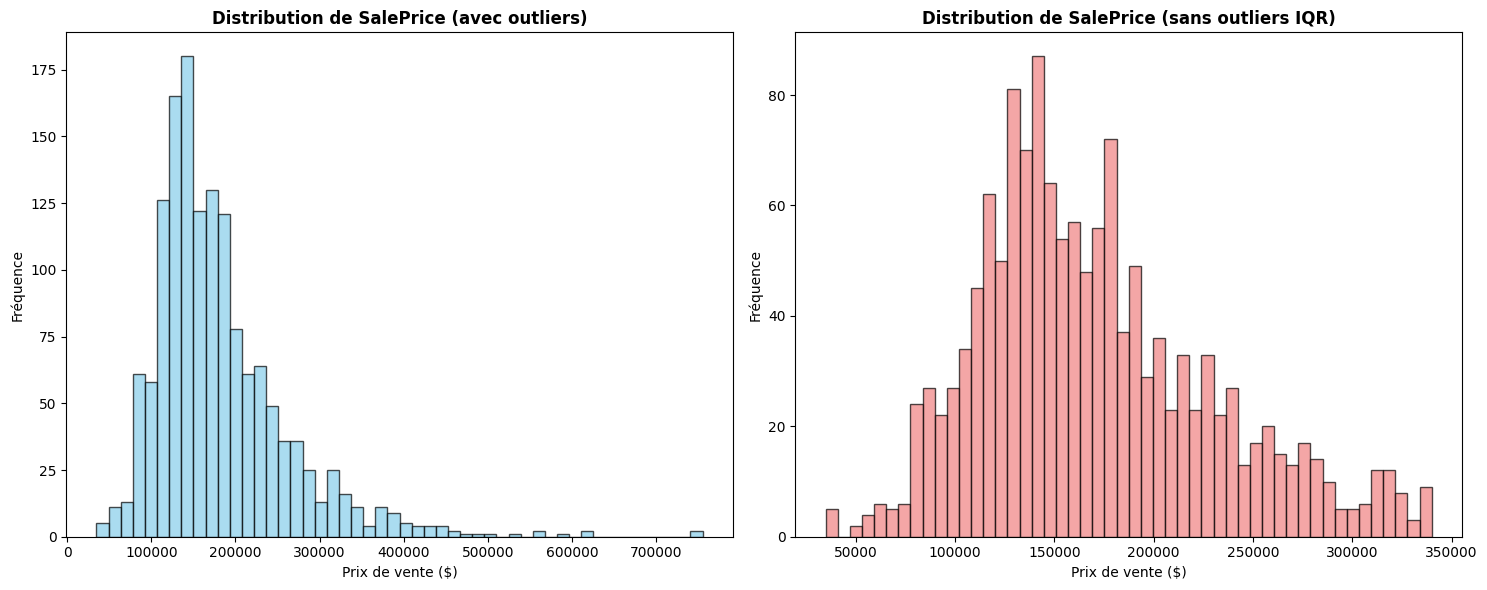

2025-07-30 20:28:26.428 | INFO     | __main__:<module>:166 - Analyse des outliers terminée. 61 outliers détectés pour SalePrice


In [63]:
print("\n=== DÉTECTION ET ANALYSE DES OUTLIERS ===")


# Fonction pour détecter les outliers avec la méthode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


# Fonction pour détecter les outliers avec la méthode Z-score
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outliers_idx = data[column].dropna().index[z_scores > threshold]
    outliers = data.loc[outliers_idx]
    return outliers


# Analyse des outliers pour les variables numériques importantes
if TARGET_VARIABLE in df_engineered.columns:
    # Sélectionner les variables numériques les plus importantes
    numeric_features_eng = df_engineered.select_dtypes(
        include=[np.number]
    ).columns.tolist()
    if TARGET_VARIABLE in numeric_features_eng:
        numeric_features_eng.remove(TARGET_VARIABLE)

    # Calculer les corrélations pour toutes les variables numériques
    all_correlations = (
        df_engineered[numeric_features_eng + [TARGET_VARIABLE]]
        .corr()[TARGET_VARIABLE]
        .drop(TARGET_VARIABLE)
    )
    top_numeric_vars = (
        all_correlations.abs().sort_values(ascending=False).head(8).index.tolist()
    )

    print(f"Variables sélectionnées pour l'analyse des outliers: {top_numeric_vars}")

    outliers_summary = []

    # Analyse des outliers pour chaque variable importante
    for var in top_numeric_vars:
        if var in df_engineered.columns:
            # Méthode IQR
            outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(
                df_engineered, var
            )

            # Méthode Z-score
            outliers_zscore = detect_outliers_zscore(df_engineered, var)

            outliers_summary.append(
                {
                    "Variable": var,
                    "Outliers_IQR": len(outliers_iqr),
                    "Outliers_ZScore": len(outliers_zscore),
                    "Pct_Outliers_IQR": (len(outliers_iqr) / len(df_engineered)) * 100,
                    "Lower_Bound": lower_bound,
                    "Upper_Bound": upper_bound,
                    "Min_Value": df_engineered[var].min(),
                    "Max_Value": df_engineered[var].max(),
                }
            )

    outliers_df = pd.DataFrame(outliers_summary)
    outliers_df = outliers_df.sort_values("Pct_Outliers_IQR", ascending=False)

    print("\nRésumé de la détection d'outliers:")
    print(outliers_df.round(2))

    # Visualisation des outliers pour les variables les plus problématiques
    top_outlier_vars = outliers_df.head(4)["Variable"].tolist()

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()

    for i, var in enumerate(top_outlier_vars):
        if i < 4 and var in df_engineered.columns:
            # Box plot avec outliers
            axes[i].boxplot(df_engineered[var].dropna(), vert=True)
            axes[i].set_title(
                f'Box Plot de {var}\n({outliers_df[outliers_df["Variable"]==var]["Outliers_IQR"].iloc[0]} outliers IQR)',
                fontweight="bold",
            )
            axes[i].set_ylabel(var)

            # Ajouter les statistiques
            stats_text = f"Min: {df_engineered[var].min():.1f}\nMax: {df_engineered[var].max():.1f}\nMéd: {df_engineered[var].median():.1f}"
            axes[i].text(
                0.02,
                0.98,
                stats_text,
                transform=axes[i].transAxes,
                verticalalignment="top",
                bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
            )

    plt.tight_layout()
    plt.show()

    # Analyse spécifique des outliers de la variable cible
    target_outliers_iqr, target_lower, target_upper = detect_outliers_iqr(
        df_engineered, TARGET_VARIABLE
    )
    target_outliers_zscore = detect_outliers_zscore(df_engineered, TARGET_VARIABLE)

    print(f"\nAnalyse des outliers pour {TARGET_VARIABLE}:")
    print(
        f"Outliers IQR: {len(target_outliers_iqr)} ({len(target_outliers_iqr)/len(df_engineered)*100:.2f}%)"
    )
    print(
        f"Outliers Z-score: {len(target_outliers_zscore)} ({len(target_outliers_zscore)/len(df_engineered)*100:.2f}%)"
    )
    print(f"Bornes IQR: [{target_lower:,.0f}, {target_upper:,.0f}]")

    if len(target_outliers_iqr) > 0:
        print("\nExemples d'outliers de prix (méthode IQR):")
        outlier_examples = target_outliers_iqr[[TARGET_VARIABLE]].head(10)
        for idx, row in outlier_examples.iterrows():
            print(f"Index {idx}: ${row[TARGET_VARIABLE]:,.0f}")

    # Visualisation comparative avec et sans outliers
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Distribution avec outliers
    axes[0].hist(
        df_engineered[TARGET_VARIABLE].dropna(),
        bins=50,
        alpha=0.7,
        color="skyblue",
        edgecolor="black",
    )
    axes[0].set_title(
        f"Distribution de {TARGET_VARIABLE} (avec outliers)", fontweight="bold"
    )
    axes[0].set_xlabel("Prix de vente ($)")
    axes[0].set_ylabel("Fréquence")

    # Distribution sans outliers
    df_no_outliers = df_engineered[
        (df_engineered[TARGET_VARIABLE] >= target_lower)
        & (df_engineered[TARGET_VARIABLE] <= target_upper)
    ]
    axes[1].hist(
        df_no_outliers[TARGET_VARIABLE].dropna(),
        bins=50,
        alpha=0.7,
        color="lightcoral",
        edgecolor="black",
    )
    axes[1].set_title(
        f"Distribution de {TARGET_VARIABLE} (sans outliers IQR)", fontweight="bold"
    )
    axes[1].set_xlabel("Prix de vente ($)")
    axes[1].set_ylabel("Fréquence")

    plt.tight_layout()
    plt.show()

    logger.info(
        f"Analyse des outliers terminée. {len(target_outliers_iqr)} outliers détectés pour {TARGET_VARIABLE}"
    )

else:
    logger.error(
        f"Impossible d'analyser les outliers sans la variable cible '{TARGET_VARIABLE}'"
    )

L'analyse confirme la présence d'outliers dans plusieurs variables clés, y compris la variable cible `SalePrice`.

- Identification des outliers : Des variables comme `TotalBathrooms` (394 outliers, 27% des données) et `TotalBsmtSF` (61 outliers, 4,18%) présentent un nombre important de valeurs extrêmes. Pour `TotalBathrooms`, ce pourcentage élevé suggère une distribution particulièrement atypique, tandis que les variables de surface comme `GrLivArea` (31 outliers) et `TotalSF` (25 outliers) reflètent probablement de très grandes propriétés non représentatives du marché général d'Ames.

- Impact sur `SalePrice` :Pour la variable cible, la méthode IQR a identifié 61 biens (environ 4,18% du jeu de données) comme des outliers, avec des prix supérieurs à 340 038.Les exemples montrent des maisons allant de 345000 à plus de 500 000$. La visualisation révèle que la suppression de ces outliers rend la distribution des prix beaucoup plus symétrique et moins étalée, centrée autour de valeurs plus typiques du marché.

- Stratégie à adopter : La présence de ces outliers, notamment les maisons à très haut prix, peut fortement influencer les performances du modèle. Bien qu'ils puissent représenter des ventes légitimes de propriétés haut de gamme, leur faible nombre (4,18%) et leur grande influence justifient de les traiter avec attention. Pour la modélisation, il sera probablement judicieux de les écarter ou d'utiliser des modèles robustes aux outliers pour éviter que le modèle ne se spécialise sur ces cas rares au détriment de la prédiction sur le marché général.

### Préparation finale des données et sauvegarde

Cette dernière étape de l'analyse exploratoire a pour but de consolider nos découvertes et de préparer les livrables pour la phase de modélisation.

Nous allons :
- Résumer les caractéristiques clés du jeu de données enrichi.
  
- Lister les variables les plus prometteuses (numériques et catégorielles) identifiées au cours de l'analyse.
    
- Sauvegarder le jeu de données enrichi, ainsi que les métadonnées de l'analyse, pour garantir la reproductibilité et faciliter le passage à la modélisation.

In [64]:
import json

print("\n=== PRÉPARATION FINALE DES DONNÉES ===")

# Résumé de l'analyse
print("\nRésumé de l'analyse exploratoire:")
print(f"- Dataset original: {df.shape[0]:,} lignes, {df.shape[1]:,} colonnes")
print(f"- Variables numériques: {len(numeric_vars)}")
print(f"- Variables catégorielles: {len(categorical_vars)}")
print(f"- Nouvelles variables créées: {len(new_features)}")
print(
    f"- Dataset enrichi: {df_engineered.shape[0]:,} lignes, {df_engineered.shape[1]:,} colonnes"
)

# Identification des variables les plus importantes
if TARGET_VARIABLE in df_engineered.columns:
    # Recalcul des corrélations avec toutes les variables
    all_numeric = df_engineered.select_dtypes(include=[np.number]).columns.tolist()
    if TARGET_VARIABLE in all_numeric:
        all_numeric.remove(TARGET_VARIABLE)

    final_correlations = (
        df_engineered[all_numeric + [TARGET_VARIABLE]]
        .corr()[TARGET_VARIABLE]
        .drop(TARGET_VARIABLE)
    )
    top_features = final_correlations.abs().sort_values(ascending=False).head(20)

    print(f"\nTop 20 des variables les plus corrélées avec {TARGET_VARIABLE}:")
    for i, (var, corr_abs) in enumerate(top_features.items(), 1):
        corr_actual = final_correlations[var]
        feature_type = "(nouvelle)" if var in new_features else "(originale)"
        print(
            f"{i:2d}. {var:<20} {feature_type:<12}: {corr_actual:6.3f} (|{corr_abs:.3f}|)"
        )

# Recommandations pour la modélisation
print("\n=== RECOMMANDATIONS POUR LA MODÉLISATION ===")

# 1. Variables recommandées
recommended_features = top_features.head(15).index.tolist()
print(f"\n1. Variables numériques recommandées ({len(recommended_features)}):")
for var in recommended_features:
    print(f"   - {var}")

# 2. Variables catégorielles recommandées
if "categorical_impact" in locals() and len(categorical_impact) > 0:
    recommended_categorical = impact_df.head(5)["Variable"].tolist()
    print(
        f"\n2. Variables catégorielles recommandées ({len(recommended_categorical)}):"
    )
    for var in recommended_categorical:
        print(f"   - {var}")

# 3. Traitement recommandé
print("\n3. Traitements recommandés:")
print("   - Transformation log de la variable cible (distribution asymétrique)")
print(
    "   - Imputation des valeurs manquantes (médiane pour numériques, mode pour catégorielles)"
)
print("   - Encodage des variables catégorielles (One-Hot ou Label Encoding)")
print("   - Standardisation des variables numériques")
print("   - Considérer la suppression ou le traitement des outliers extrêmes")

# Sauvegarde des données enrichies
output_file = OUTPUT_DIR / "house_price_01_analyse_dataset_enrichi.csv"
df_engineered.to_csv(output_file, index=False)
print(f"\nDataset enrichi sauvegardé: {output_file}")

# Sauvegarde des métadonnées de l'analyse
analysis_metadata = {
    "analysis_date": CURRENT_DATE.isoformat(),
    "original_shape": df.shape,
    "enriched_shape": df_engineered.shape,
    "target_variable": TARGET_VARIABLE,
    "new_features_created": new_features,
    "top_numeric_features": recommended_features,
    "recommended_categorical": (
        recommended_categorical if "recommended_categorical" in locals() else []
    ),
    "missing_values_summary": {
        "total_missing_cells": int(df.isnull().sum().sum()),
        "variables_with_missing": int((df.isnull().sum() > 0).sum()),
        "missing_percentage": float(
            (df.isnull().sum().sum() / np.prod(df.shape)) * 100
        ),
    },
    "target_statistics": {
        "mean": float(df[TARGET_VARIABLE].mean()),
        "median": float(df[TARGET_VARIABLE].median()),
        "std": float(df[TARGET_VARIABLE].std()),
        "skewness": float(skew(df[TARGET_VARIABLE].dropna())),
        "outliers_count": (
            int(len(target_outliers_iqr)) if "target_outliers_iqr" in locals() else 0
        ),
    },
}

metadata_file = OUTPUT_DIR / "house_price_01_analyse_metadata.json"
with open(metadata_file, "w") as f:
    json.dump(analysis_metadata, f, indent=2)
print(f"Métadonnées de l'analyse sauvegardées: {metadata_file}")

# Génération d'un rapport de profiling (si ydata-profiling est disponible)
try:
    from ydata_profiling import ProfileReport

    print("\nGénération du rapport de profiling automatique...")
    profile = ProfileReport(
        df_engineered.sample(min(1000, len(df_engineered))),
        title="House Price Dataset - Profiling Report",
        explorative=True,
    )

    profile_file = REPORTS_DIR / "house_price_profiling_report.html"
    profile.to_file(profile_file)
    print(f"Rapport de profiling sauvegardé: {profile_file}")

except ImportError:
    print("\nydata-profiling non disponible, rapport de profiling non généré")
except Exception as e:
    print(f"\nErreur lors de la génération du rapport de profiling: {e}")

print("\n" + "=" * 80)
print("ANALYSE EXPLORATOIRE TERMINÉE AVEC SUCCÈS")
print("=" * 80)
print("Fichiers générés:")
print(f"- Dataset enrichi: {output_file}")
print(f"- Métadonnées: {metadata_file}")
if "profile_file" in locals():
    print(f"- Rapport de profiling: {profile_file}")
print("\nPrêt pour la phase de modélisation !")

logger.info("Analyse exploratoire terminée avec succès")


=== PRÉPARATION FINALE DES DONNÉES ===

Résumé de l'analyse exploratoire:
- Dataset original: 1,460 lignes, 81 colonnes
- Variables numériques: 38
- Variables catégorielles: 43
- Nouvelles variables créées: 9
- Dataset enrichi: 1,460 lignes, 90 colonnes

Top 20 des variables les plus corrélées avec SalePrice:
 1. OverallQual          (originale) :  0.791 (|0.791|)
 2. TotalSF              (nouvelle)  :  0.782 (|0.782|)
 3. GrLivArea            (originale) :  0.709 (|0.709|)
 4. GarageCars           (originale) :  0.640 (|0.640|)
 5. TotalBathrooms       (nouvelle)  :  0.632 (|0.632|)
 6. GarageArea           (originale) :  0.623 (|0.623|)
 7. TotalBsmtSF          (originale) :  0.614 (|0.614|)
 8. 1stFlrSF             (originale) :  0.606 (|0.606|)
 9. QualityScore         (nouvelle)  :  0.565 (|0.565|)
10. FullBath             (originale) :  0.561 (|0.561|)
11. TotRmsAbvGrd         (originale) :  0.534 (|0.534|)
12. HouseAge             (nouvelle)  : -0.523 (|0.523|)
13. YearBuilt   

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 90/90 [00:02<00:00, 31.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

2025-07-30 20:34:27.468 | INFO     | __main__:<module>:134 - Analyse exploratoire terminée avec succès


Rapport de profiling sauvegardé: d:\Documents\IT\mlops_house_price_prediction\notebooks\reports\house_price_profiling_report.html

ANALYSE EXPLORATOIRE TERMINÉE AVEC SUCCÈS
Fichiers générés:
- Dataset enrichi: d:\Documents\IT\mlops_house_price_prediction\notebooks\output_files\house_price_01_analyse_dataset_enrichi.csv
- Métadonnées: d:\Documents\IT\mlops_house_price_prediction\notebooks\output_files\house_price_01_analyse_metadata.json
- Rapport de profiling: d:\Documents\IT\mlops_house_price_prediction\notebooks\reports\house_price_profiling_report.html

Prêt pour la phase de modélisation !


Cette première phase d'analyse exploratoire est terminée. Nous avons transformé un jeu de données brut en une ressource prête pour la modélisation.

Les points clés à retenir sont :

- La variable cible `SalePrice` est asymétrique et bénéficiera grandement d'une transformation logarithmique.
  
- La qualité et la surface sont importantes : Des variables comme `OverallQual`, et nos nouvelles variables `TotalSF` et `QualityScore`, sont les prédicteurs les plus puissants du prix de vente.
  
- Le contexte géographique est aussi essentiel : Le quartier (`Neighborhood`) est la variable catégorielle la plus influente.
  
- Les données nécessitent un nettoyage : Le traitement des valeurs manquantes et des outliers sera une étape indispensable avant l'entraînement des modèles.

Grâce à la sauvegarde du jeu de données enrichi et des métadonnées, nous disposons maintenant d'une base solide et documentée pour construire et évaluer différents modèles de prédiction. La prochaine étape consistera à mettre en œuvre les recommandations de prétraitement et à tester plusieurs algorithmes pour trouver le plus performant.